In [49]:
import numpy as np
import time
import matplotlib.pyplot as plt
import qcodes as qc
import qcodes.instrument_drivers.nplab_drivers as npd
import matplotlib.colors as colors
from matplotlib.colors import SymLogNorm, LogNorm, DivergingNorm
import os
from scipy.interpolate import RectBivariateSpline
from scipy.ndimage import gaussian_filter
import matplotlib.colors as colors
import colorcet as cc

In [9]:
plt.rcParams['svg.fonttype'] = 'none'
plt.rcParams['figure.dpi'] = 300
%config InlineBackend.figure_format = 'svg' 

In [10]:
font = {
                'family': 'Arial',
                'size': 12,
                'serif': 'Times',
                'sans-serif': 'Arial'
            }

plt.rc('font', **font)

In [11]:
cd ..

/Users/robertpolski/Documents/NPGroupResearch/Measurements/Triton/qcodes_data


In [12]:
qc.DataSet.default_io.base_location = os.path.abspath('.')
figfile = os.path.abspath('.') + '/Figures/M10_M12TBGWSe2AnalysisRobbie/'

In [2]:
# %matplotlib notebook

In [7]:
pwd

'/Users/robertpolski/Documents/NPGroupResearch/Measurements/Triton/qcodes_data'

# Device M12

In [8]:
datafan1 = qc.load_data('data/2019-10-31/#017_M12_12-13and13-20_LandauFan_17-58-32')
gvals = datafan1.srframe_volt_p1_set[0, :]
bvals = datafan1.triton_field_set_stable_set[:-2]
Rxx = datafan1.lockin865_X[:-2, :]/0.5e-9
Rxy = datafan1.lockin830_X[:-2]

In [9]:
RR = np.sqrt(Rxx**2 + Rxy**2)

In [32]:
gvals[190]

-7.0

In [33]:
len(bvals)

159

In [34]:
Rxx[140, 190]

-31919.105821999994

<IPython.core.display.Javascript object>


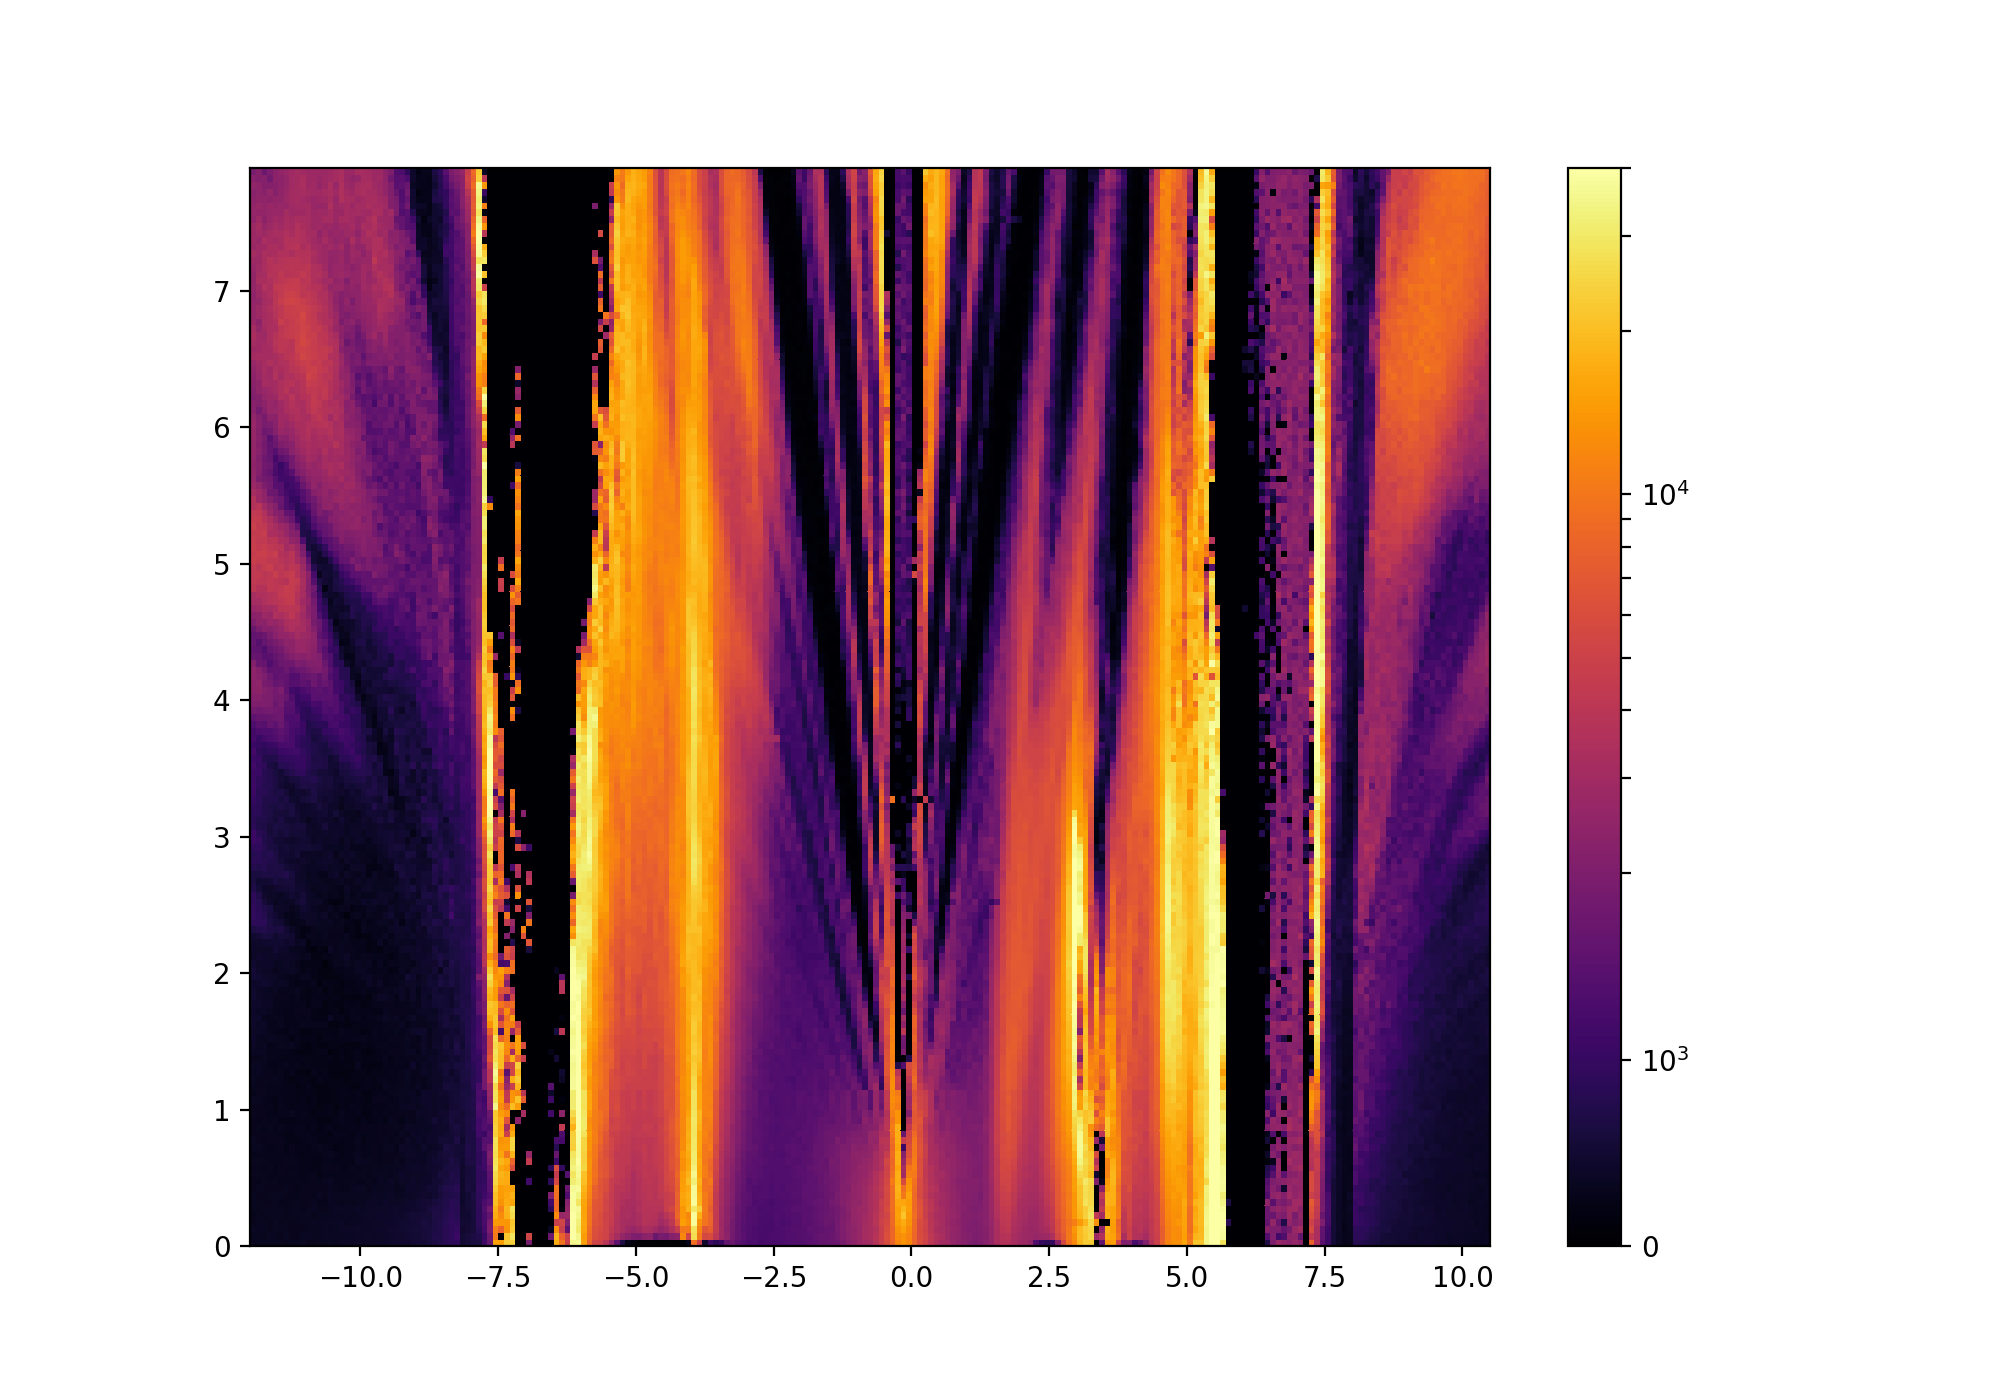

In [48]:
# R value
plt.figure(figsize=(10,7))
plt.pcolormesh(gvals[15:], bvals, Rxx[:, 15:], cmap='inferno', norm=SymLogNorm(2000, vmin=0, vmax=40000))
plt.colorbar()

<IPython.core.display.Javascript object>


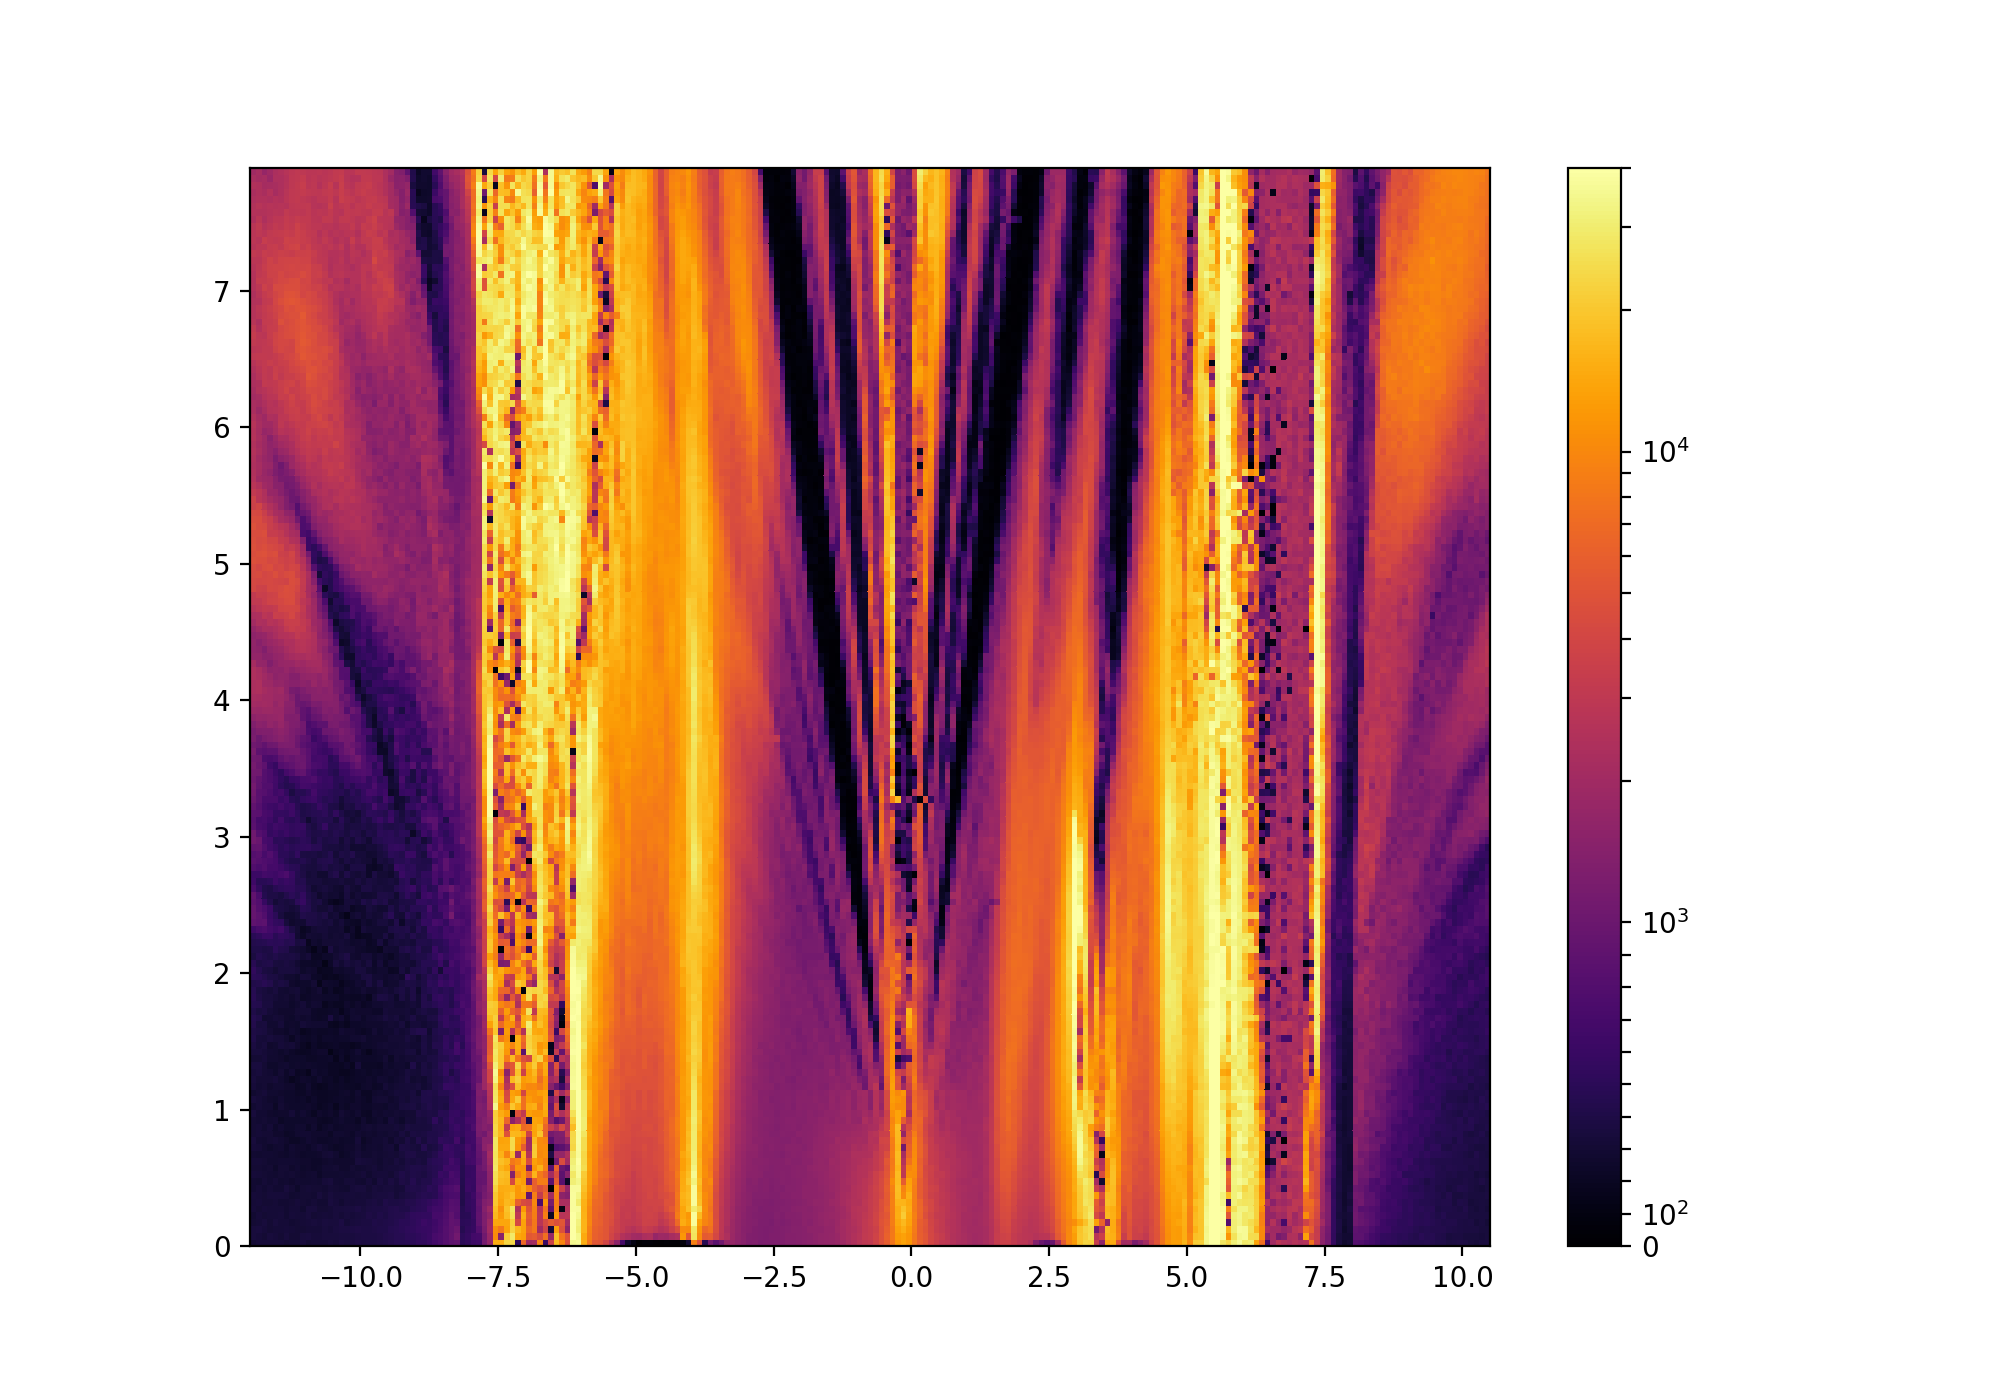

In [51]:
# R value
plt.figure(figsize=(10,7))
plt.pcolormesh(gvals[15:], bvals, RR[:, 15:], cmap='inferno', norm=SymLogNorm(1000, vmin=0, vmax=40000))
plt.colorbar()

In [52]:
Rav = np.average(Rxx, axis=0)

<IPython.core.display.Javascript object>


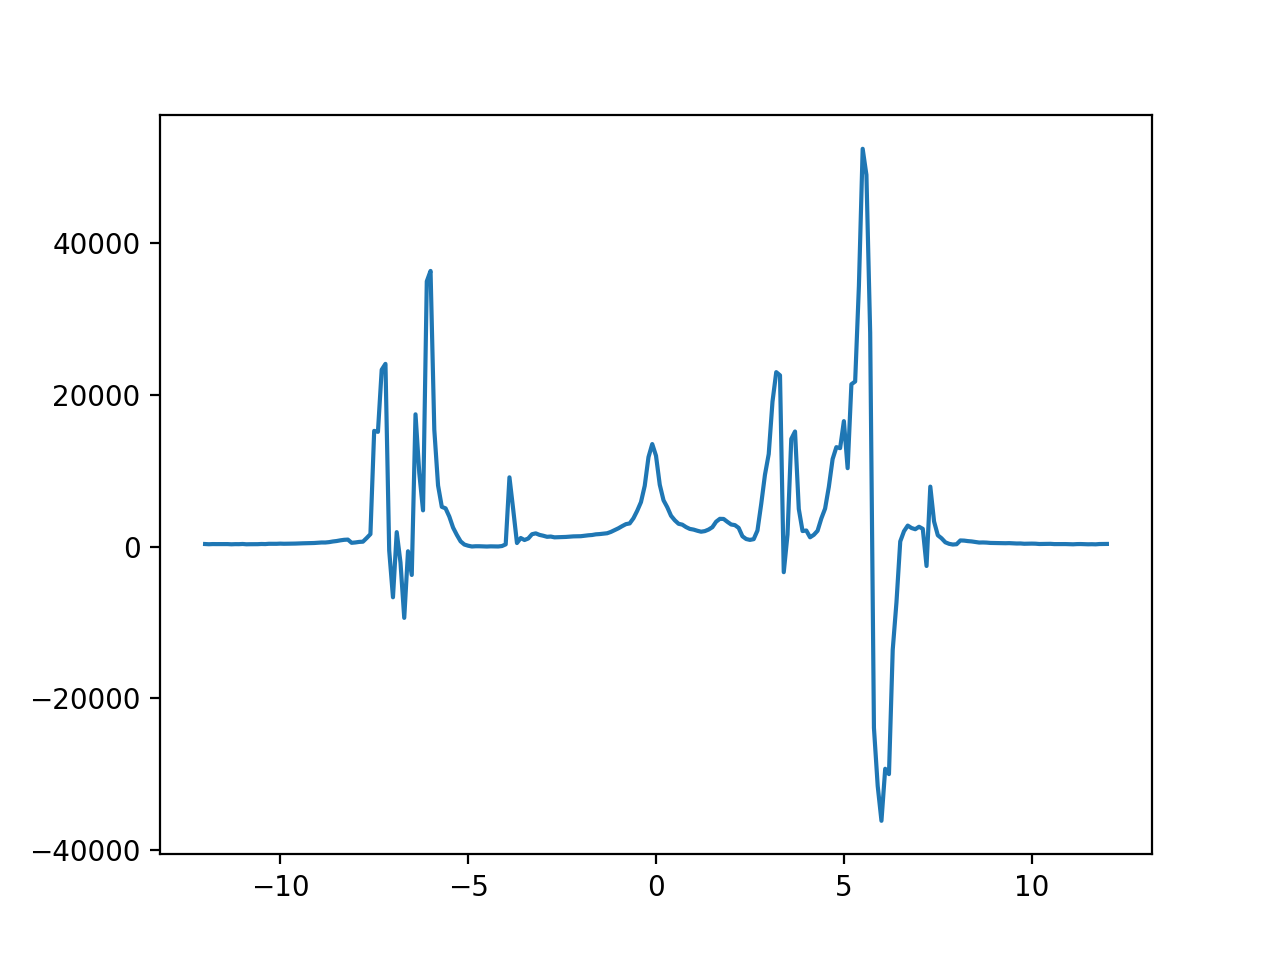

In [188]:
plt.figure()
plt.plot(gvals, Rxx[0])

<IPython.core.display.Javascript object>


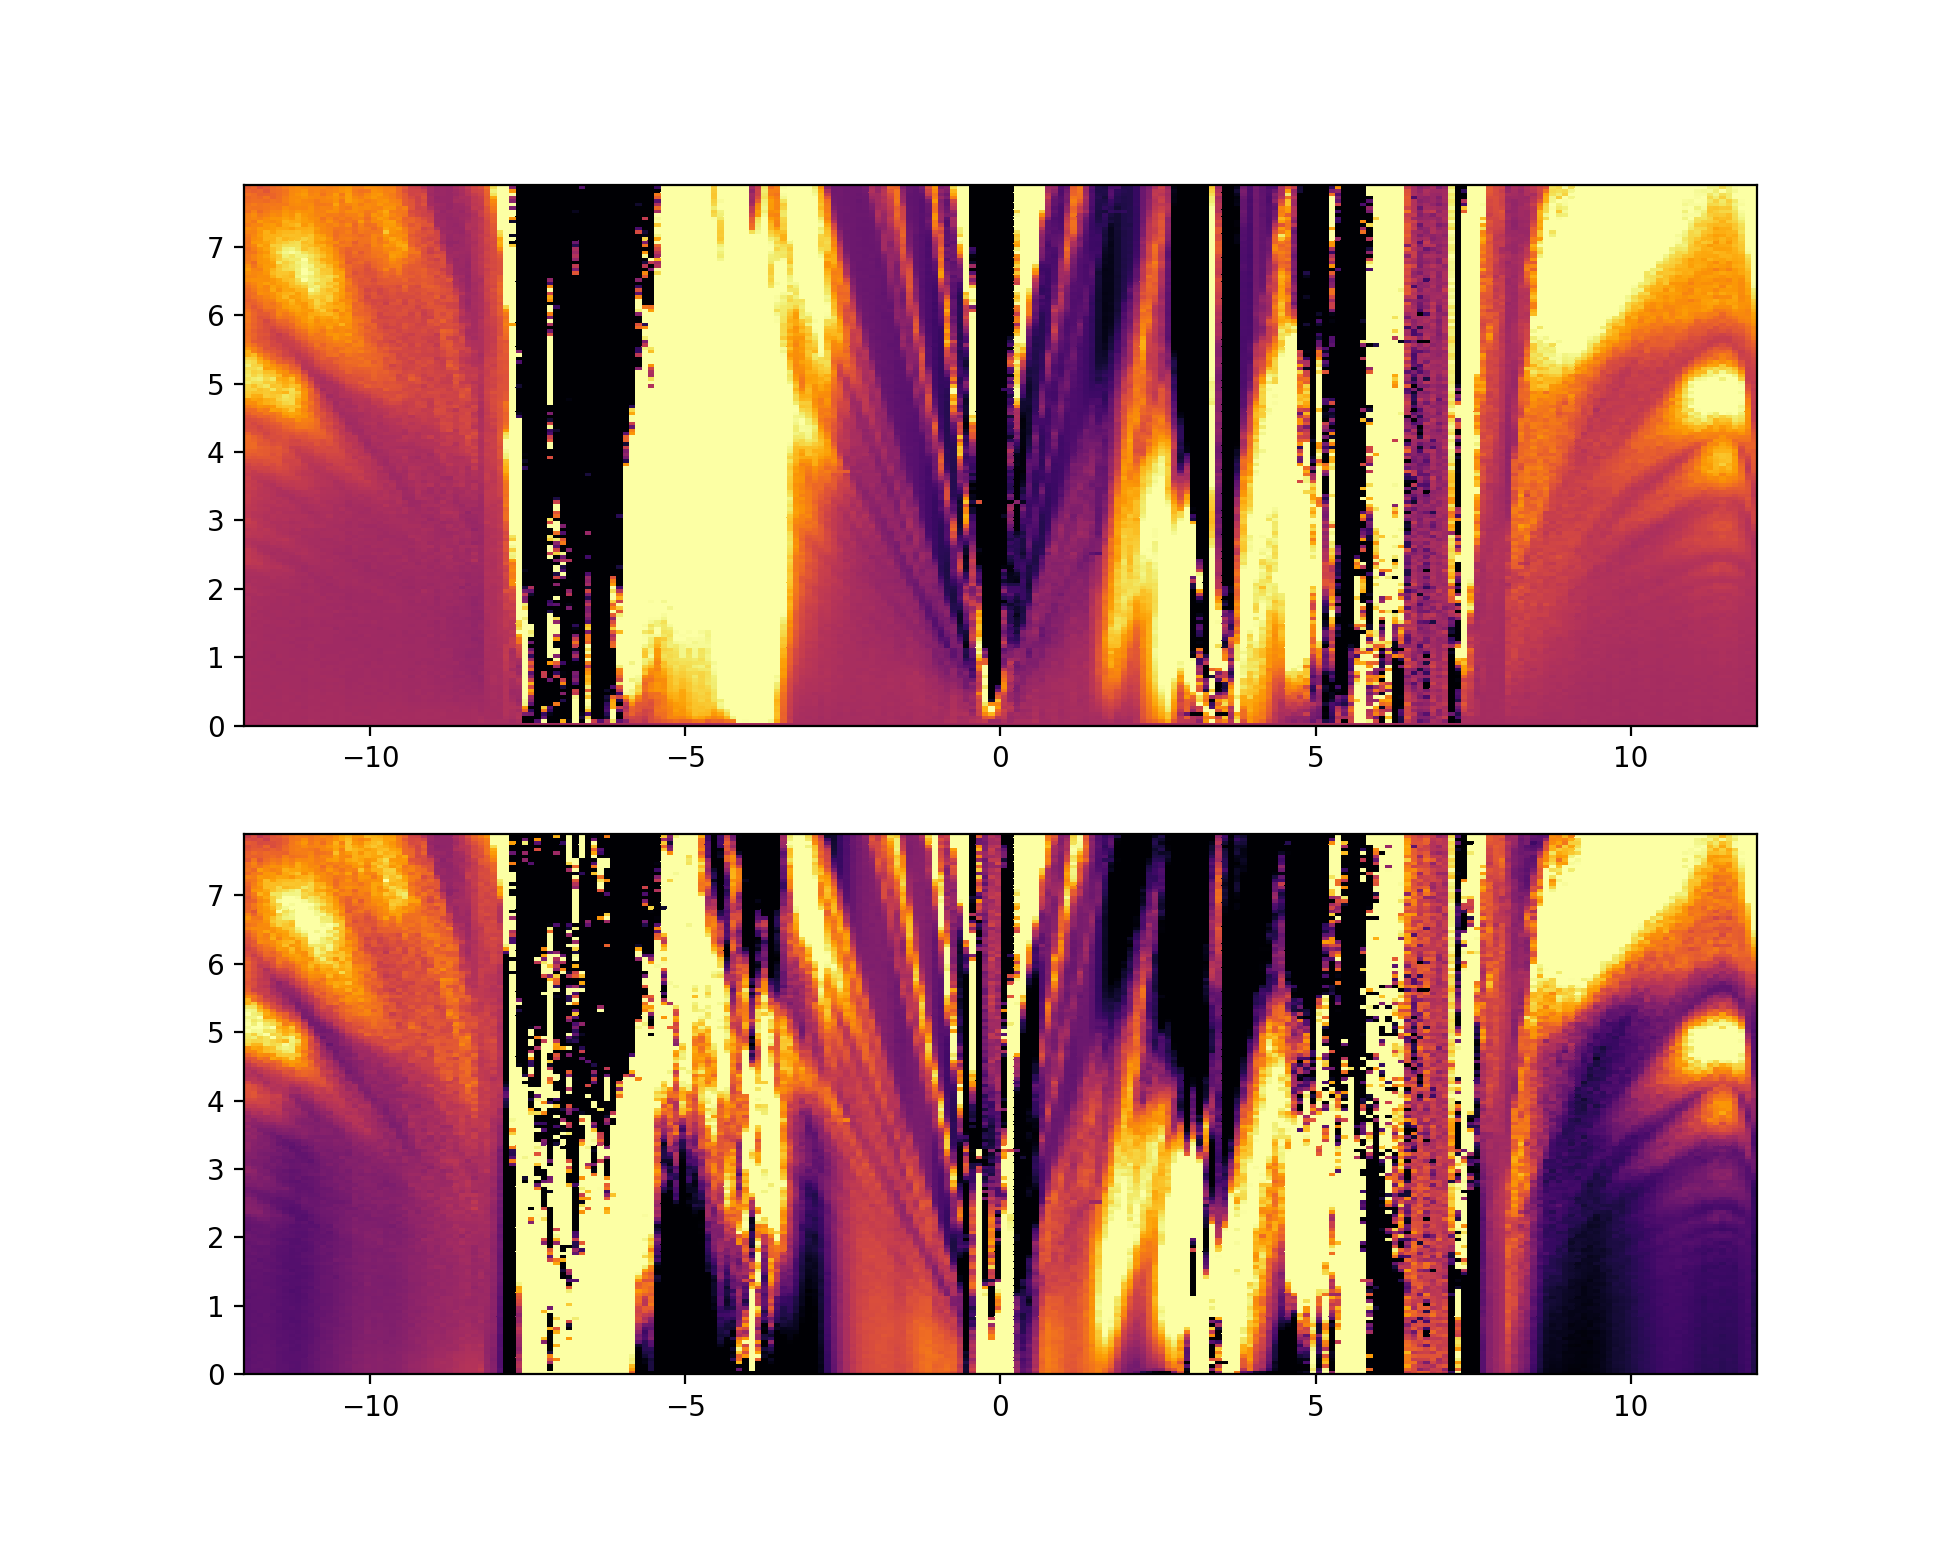

In [193]:
multarr = np.linspace(-7.9/15, 7.9/15, len(bvals))
rsub = Rav*multarr[:, np.newaxis]
Ravav = Rav*np.ones(len(bvals))[:, np.newaxis]
R00 = Rxx[0]*np.ones(len(bvals))[:, np.newaxis]
fig, ax = plt.subplots(2, 1)
ax[0].pcolormesh(gvals, bvals, Rxx - R00, cmap='inferno', vmin=-4000, vmax=5000)#norm=SymLogNorm(100, vmin=0, vmax=40000))
ax[1].pcolormesh(gvals, bvals, Rxx - Ravav, cmap='inferno', vmin=-3000, vmax=3000)

<IPython.core.display.Javascript object>


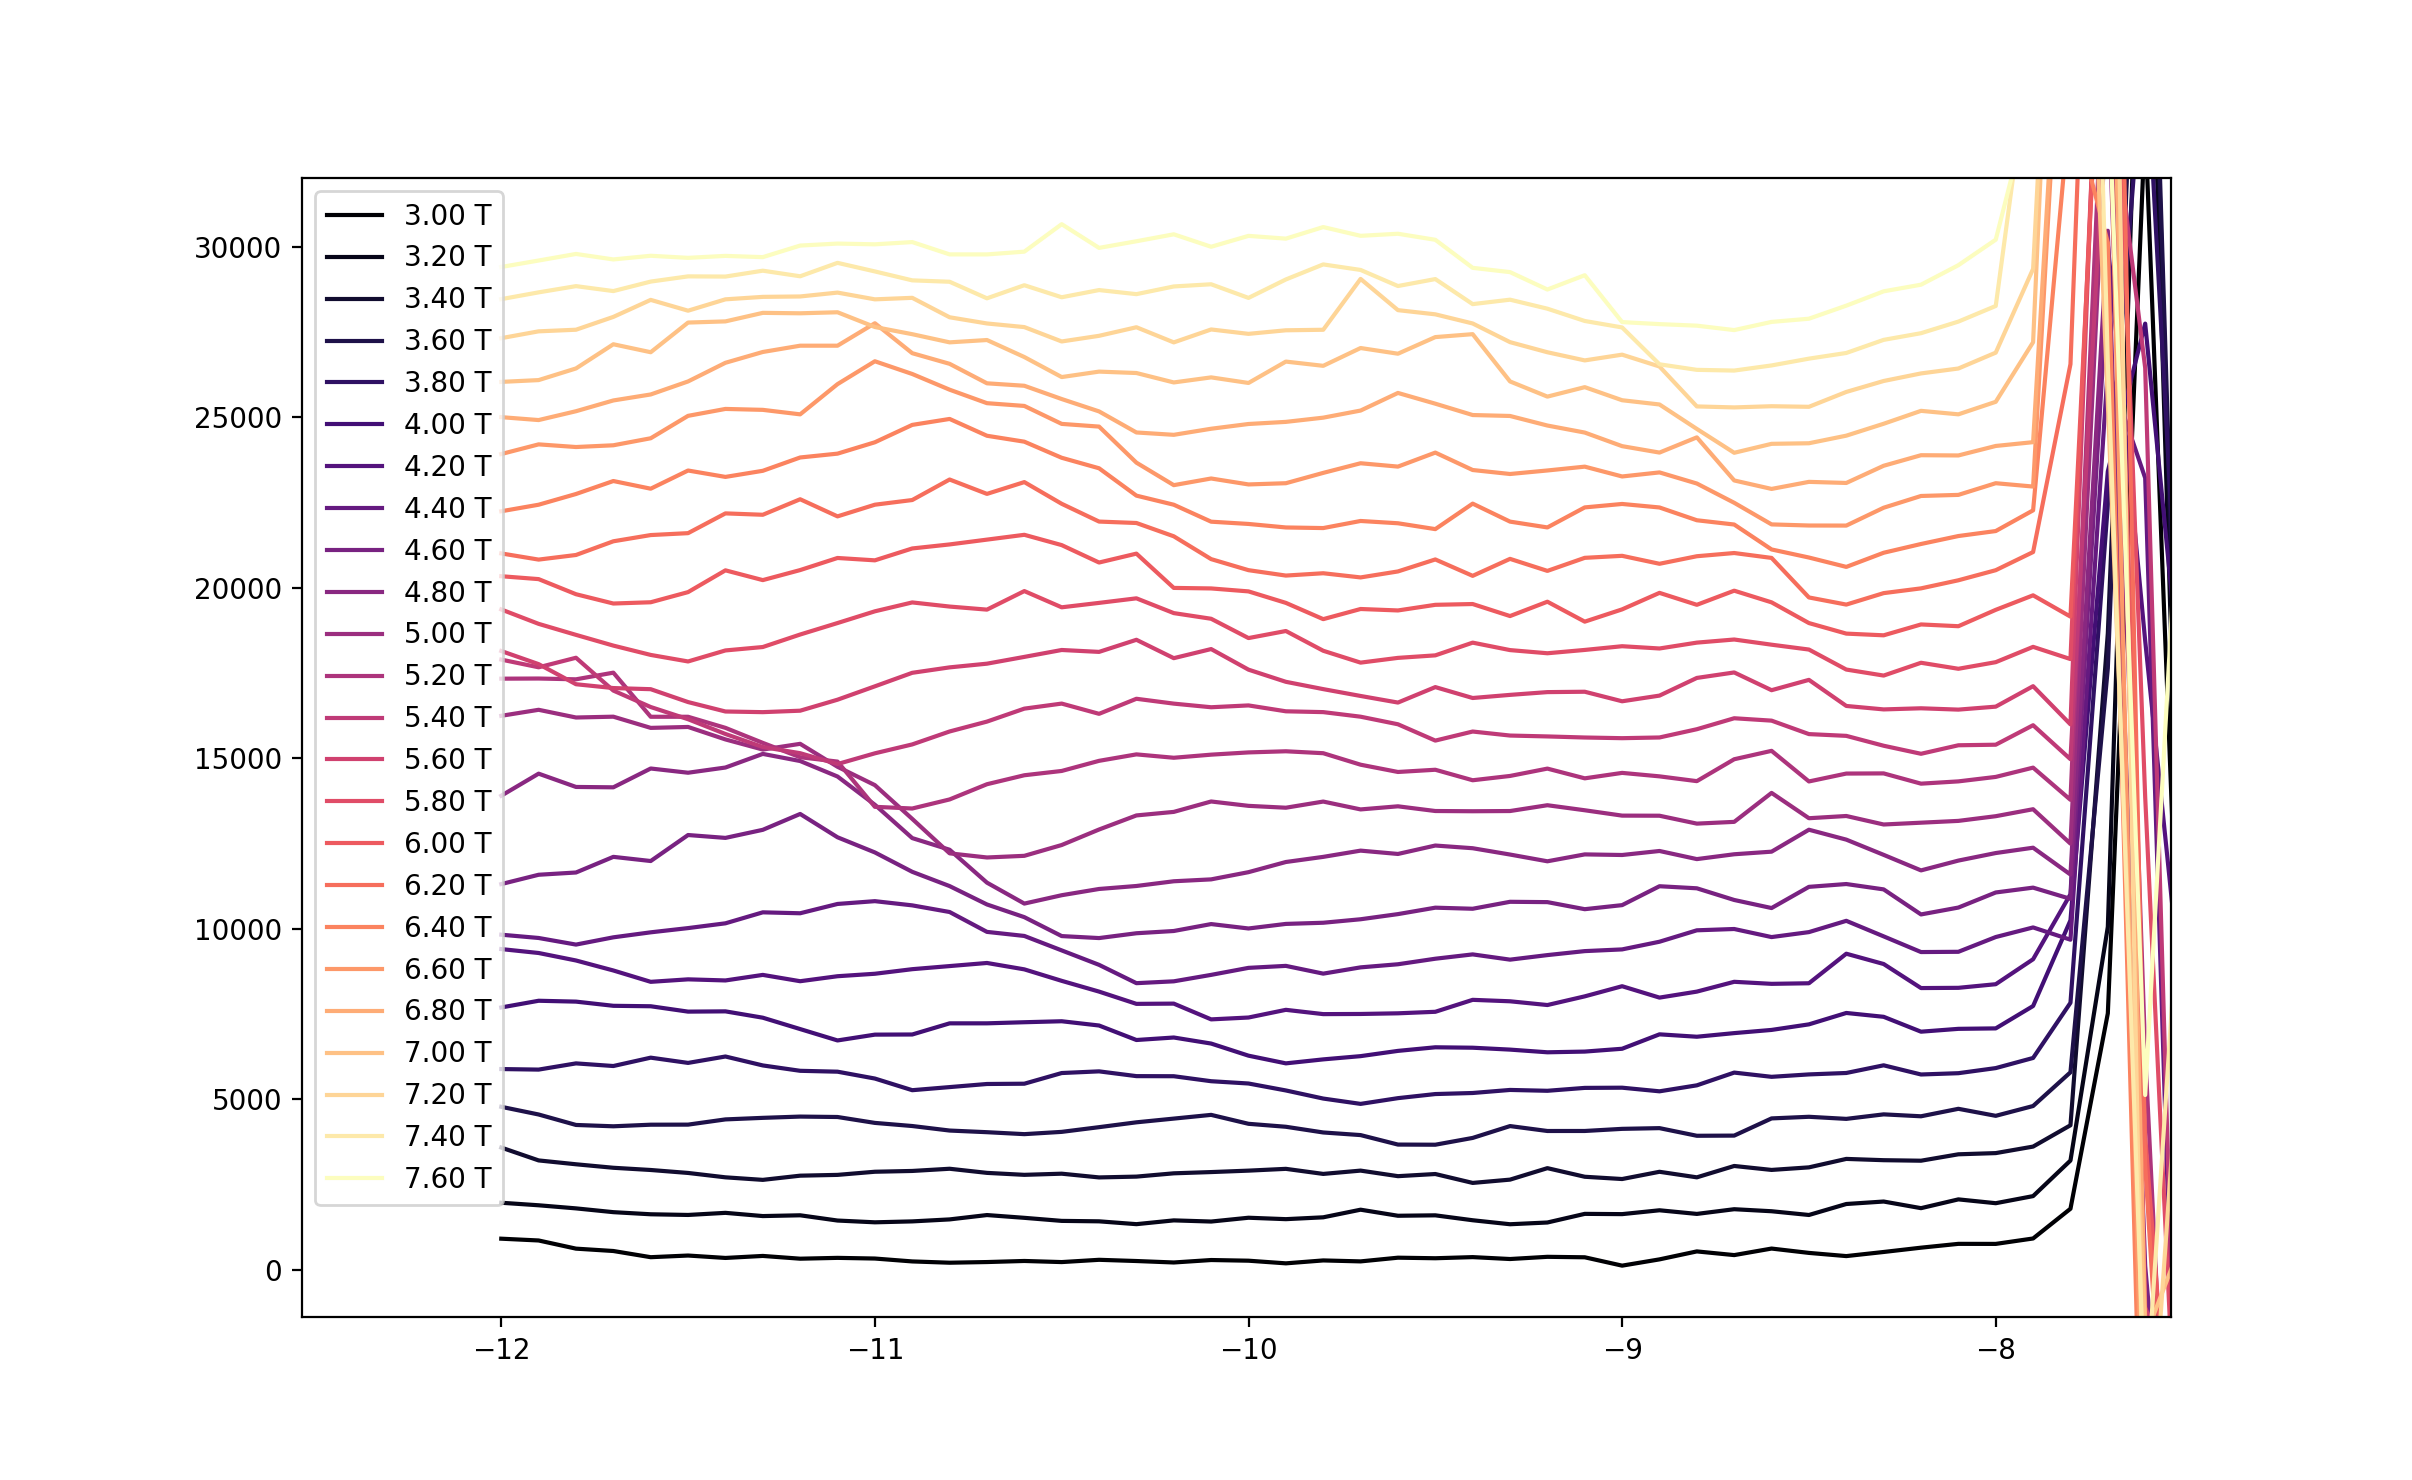

In [79]:
N = 12*2
cm = plt.get_cmap('magma')([i/(N-1) for i in range(N)])
plt.figure()
for i in range(N):
    ind = i*4 + 60
    field = bvals[ind]
    plt.plot(gvals, Rxx[ind, :] - Rav*field/25 + i*1200, label='{:.2f} T'.format(field), color=cm[i])
plt.legend()

In [10]:
vhf0 = np.array([-10.844, -11.085, -11.545, -11.791])
bhf0 = np.array([3.8, 4, 4.2, 4.4])
vhf1 = np.array([-9.695, -10.083, -10.455, -10.690, -11.078, -11.490, -11.890])
bhf1 = np.array([3.8, 4.2, 4.6, 5, 5.4, 5.8, 6.2])
vhf2 = np.array([-9.469, -9.687, -9.857, -10.132, -10.229])
bhf2 = np.array([5.4, 5.8, 6.2, 6.6, 7])
vhf3 = np.array([-8.200, -8.289, -8.418, -8.491, -8.677, -8.749, -8.798])
bhf3 = np.array([5.4, 5.8, 6.2, 6.6, 7, 7.4, 7.8])

vshf = np.concatenate((vhf3, vhf2, vhf1, vhf0))
bshf = np.concatenate((4*bhf3, 8*bhf2, 12*bhf1, 16*bhf0))

pshf = np.polyfit(vshf, bshf, 1)
print(pshf)
V0fh = -pshf[1]/pshf[0]
print('full filling point: {} V'.format(V0fh))
Cfh = -1*pshf[0]*1.602e-19**2/6.626e-34
dbnfh = 3*8.85e-12/Cfh
print('dBN effective: {:.2f} nm'.format(dbnfh*10**9))

[-14.1749849  -93.04225578]
full filling point: -6.563834559242219 V
dBN effective: 48.36 nm


<IPython.core.display.Javascript object>


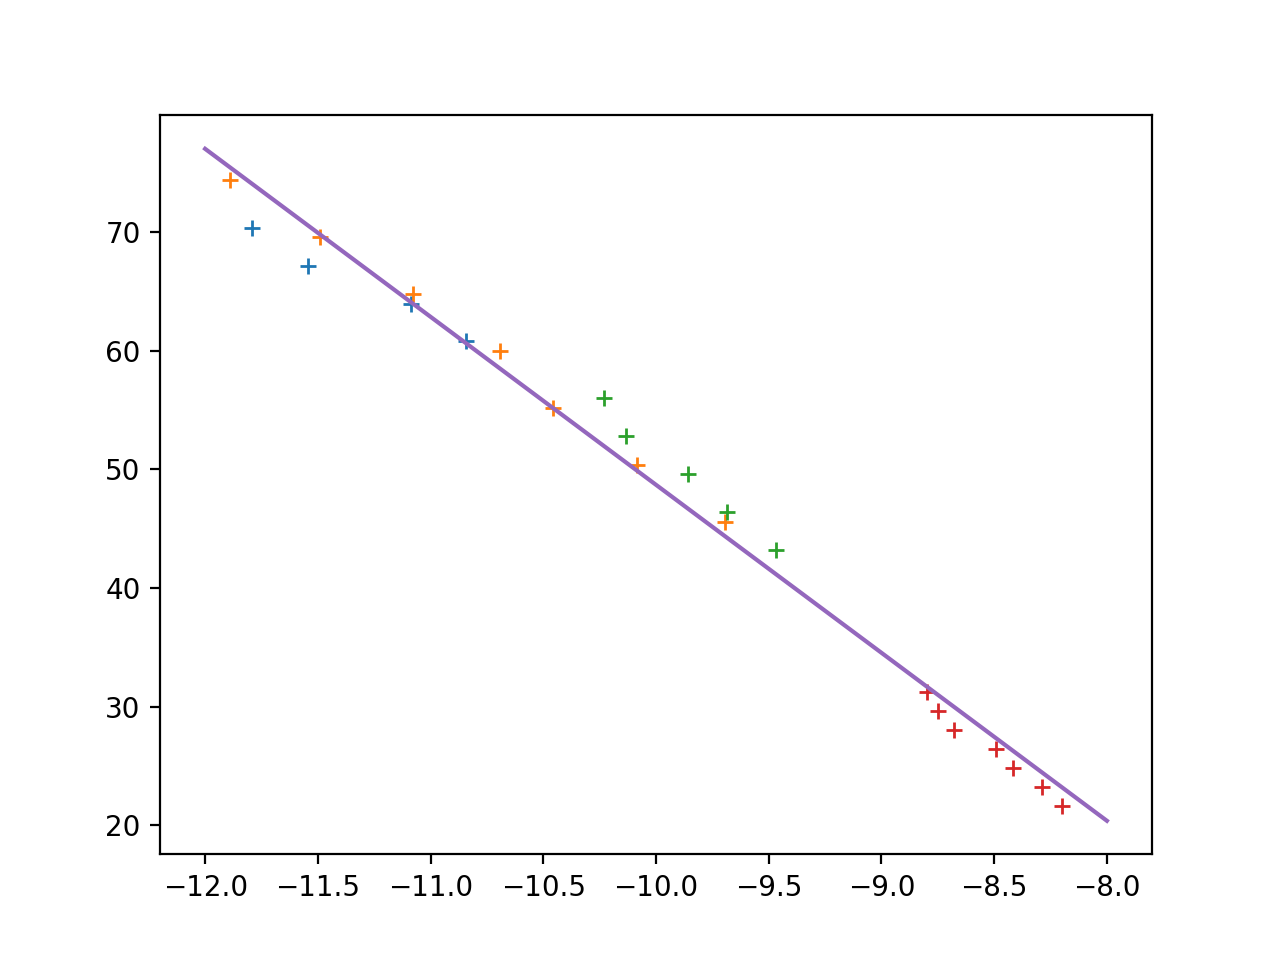

In [97]:
plt.figure()
plt.plot(vhf0, 16*bhf0, '+')
plt.plot(vhf1, 12*bhf1, '+')
plt.plot(vhf2, 8*bhf2, '+')
plt.plot(vhf3, 4*bhf3, '+')
xl = np.array([-12, -8])
plt.plot(xl, xl*pshf[0] + pshf[1])

<IPython.core.display.Javascript object>


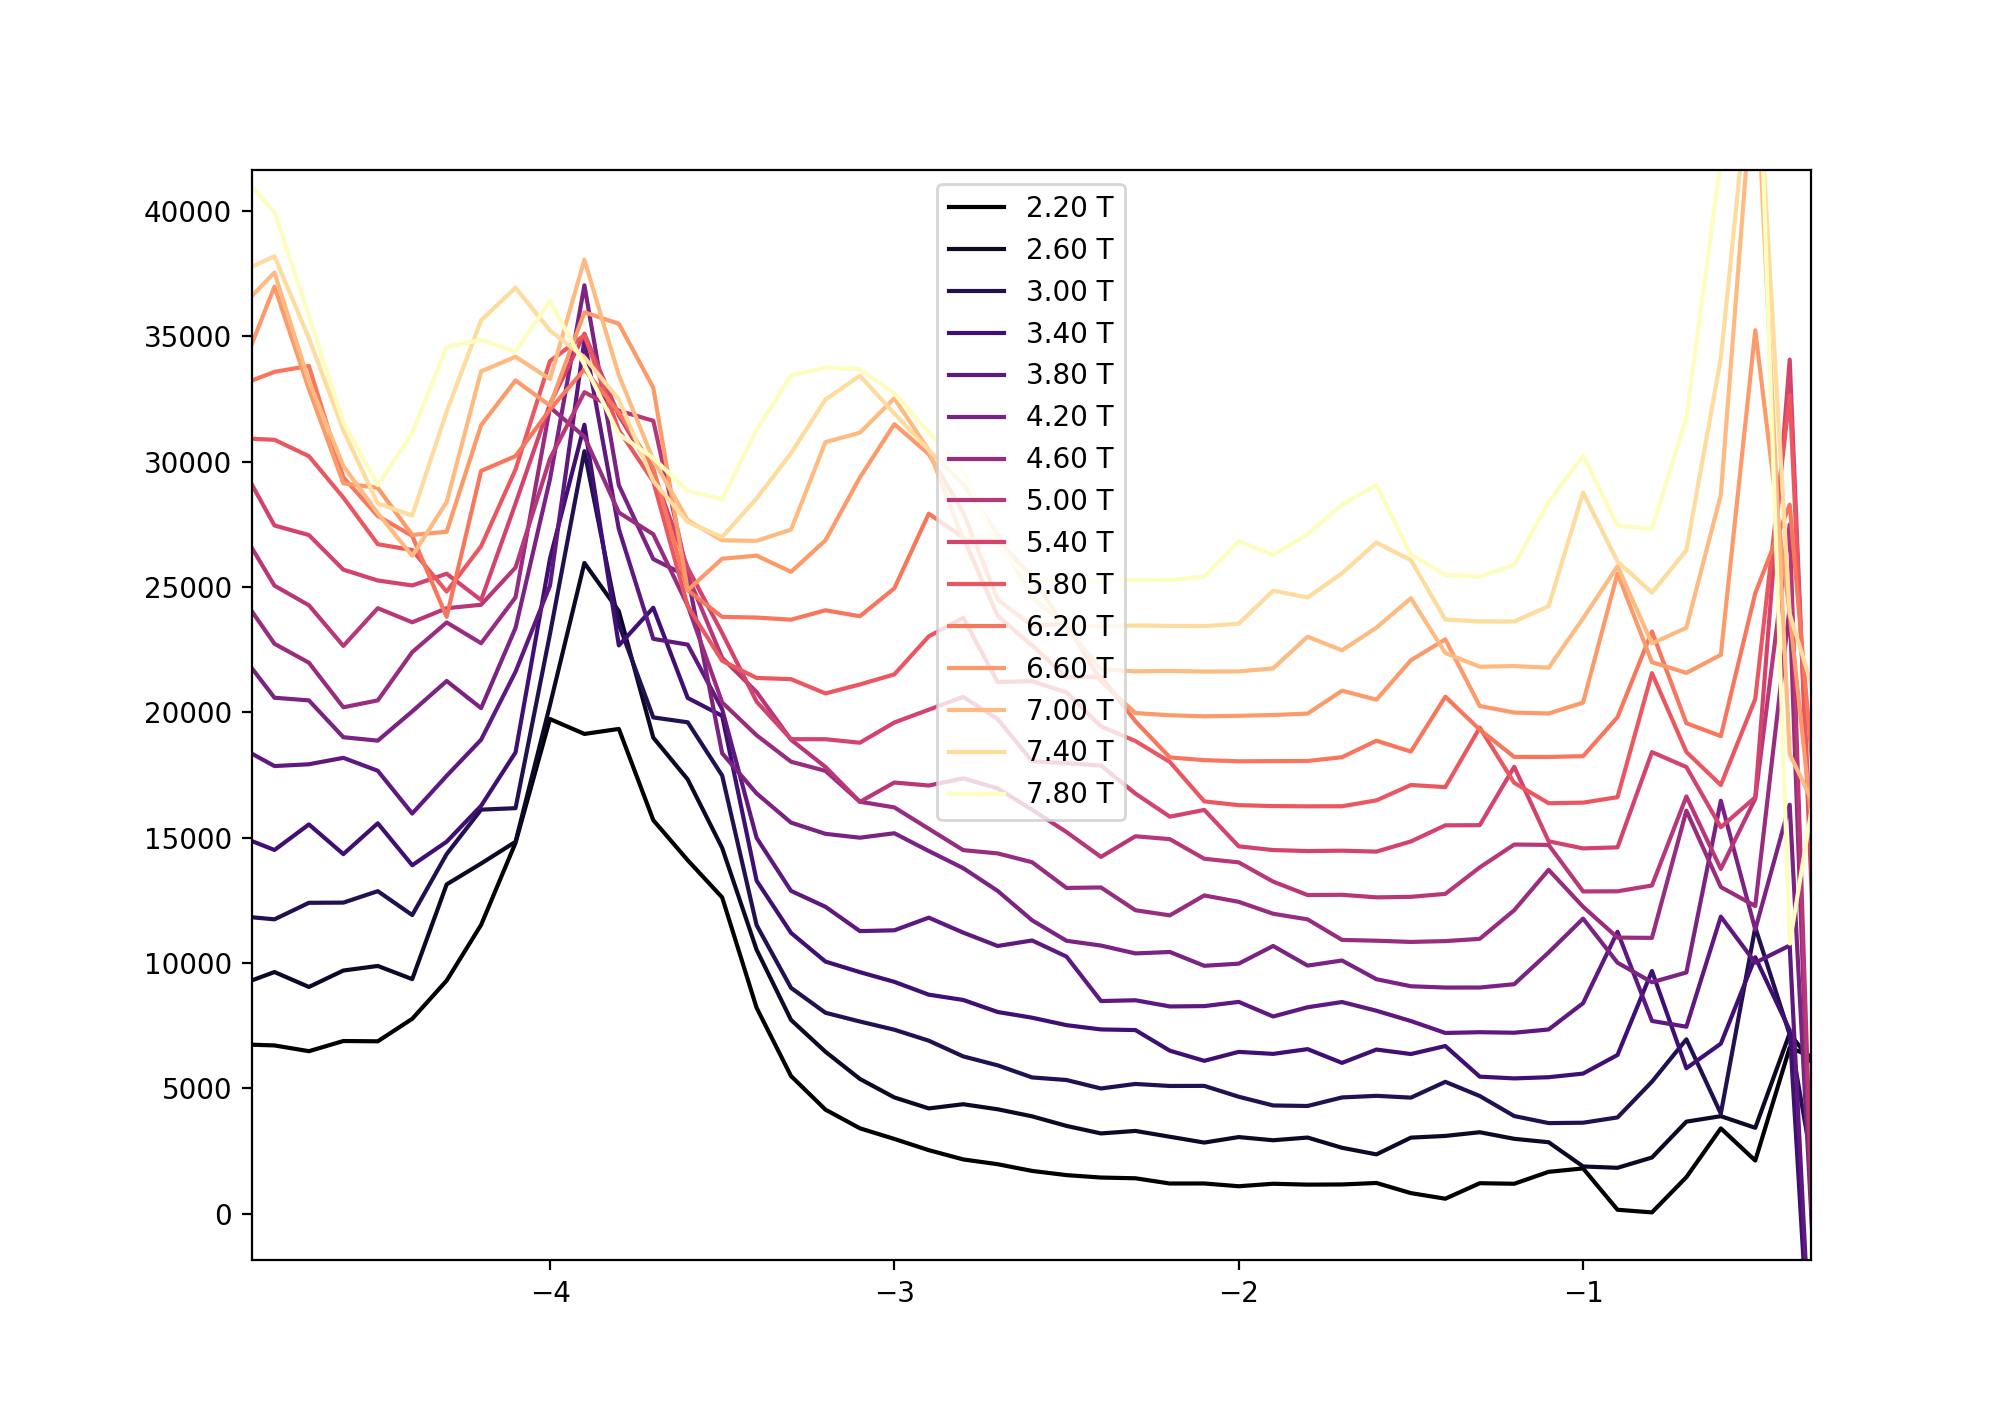

In [197]:
N = 15
cm = plt.get_cmap('magma')([i/(N-1) for i in range(N)])
plt.figure()
for i in range(N):
    ind = i*8 + 44
    field = bvals[ind]
    plt.plot(gvals, Rxx[ind, :] + i*1800, label='{:.2f} T'.format(field), color=cm[i])
plt.legend()

<IPython.core.display.Javascript object>


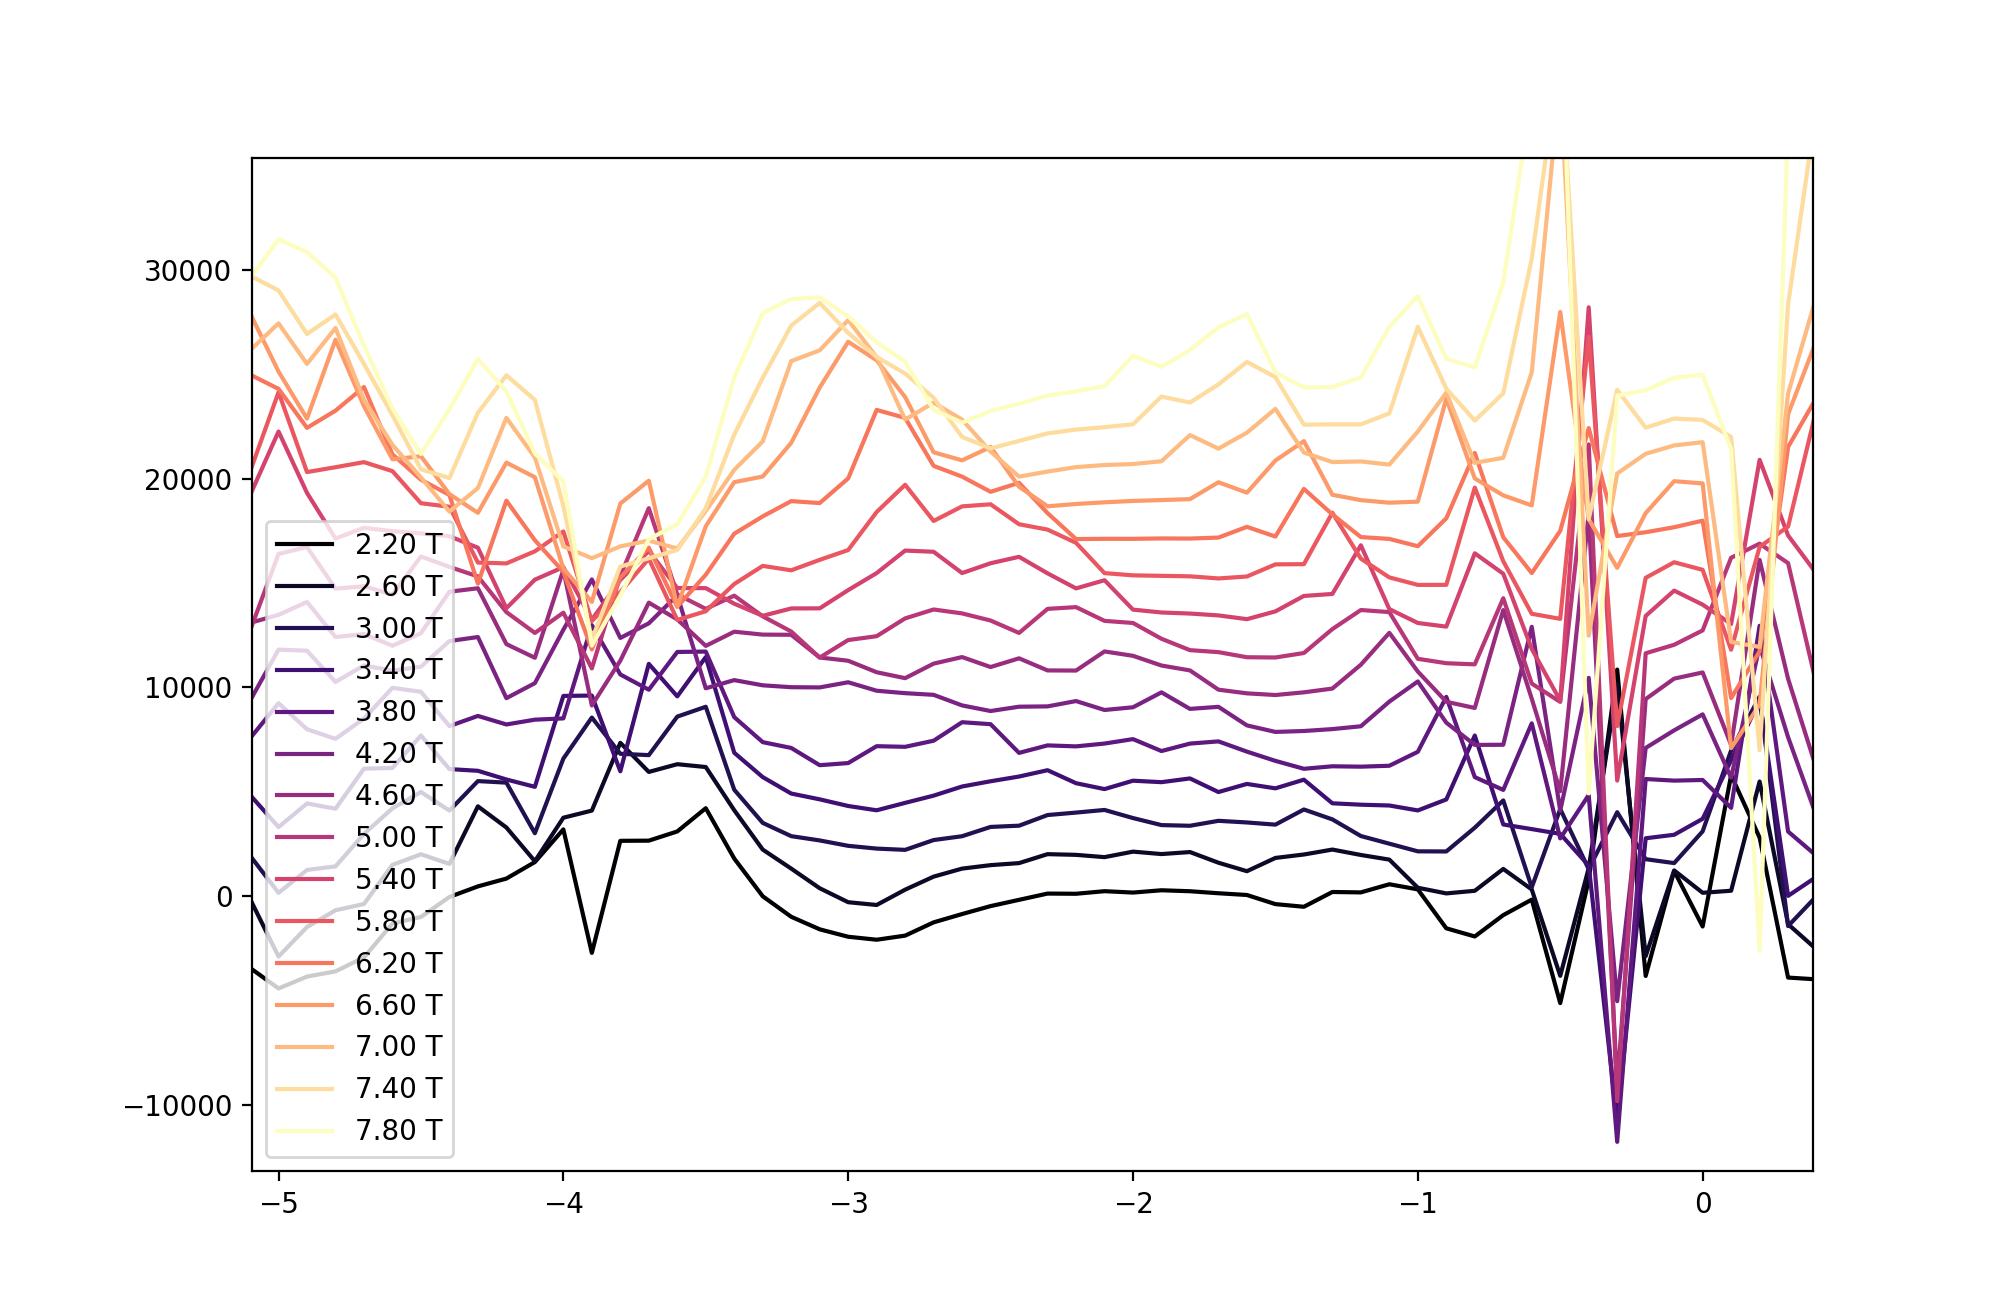

In [196]:
N = 15
cm = plt.get_cmap('magma')([i/(N-1) for i in range(N)])
plt.figure()
for i in range(N):
    ind = i*8 + 44
    field = bvals[ind]
    plt.plot(gvals, Rxx[ind, :] - Ravav[ind, :] + i*1800, label='{:.2f} T'.format(field), color=cm[i])
plt.legend()

<IPython.core.display.Javascript object>


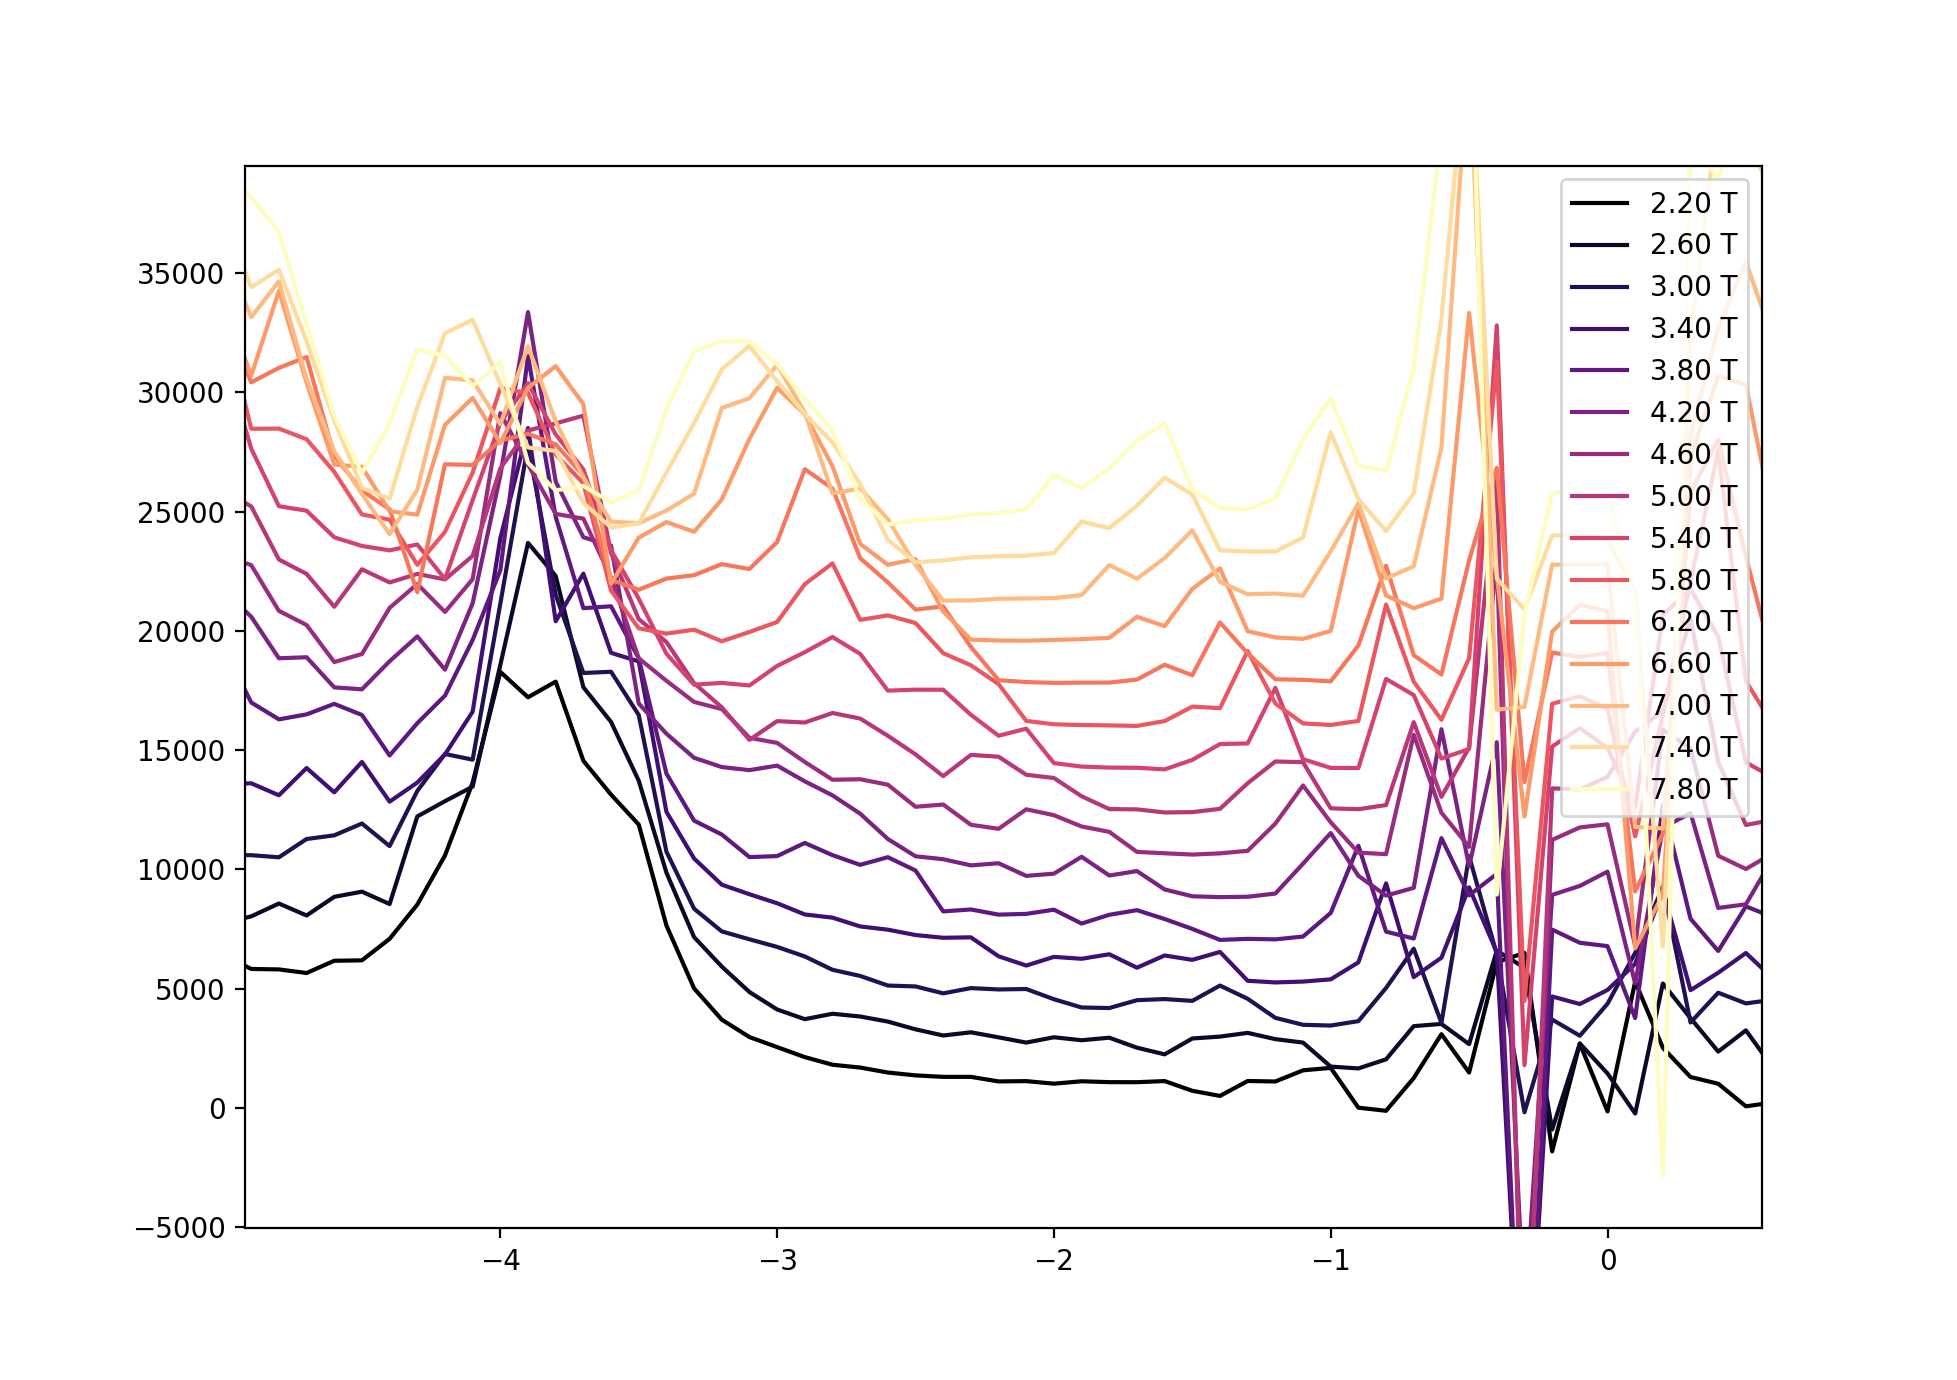

In [103]:
N = 15
cm = plt.get_cmap('magma')([i/(N-1) for i in range(N)])
plt.figure()
for i in range(N):
    ind = i*8 + 44
    field = bvals[ind]
    plt.plot(gvals, Rxx[ind, :] - Rav*field/25 + i*1800, label='{:.2f} T'.format(field), color=cm[i])
plt.legend()

In [11]:
vsh0 = np.array([-0.55, -0.593, -0.629, -0.68, -0.759, -0.796, -0.832])
bsh0 = np.arange(5.4, 8.2, 0.4)
vsh1 = np.array([-0.499, -0.593, -0.658, -0.731, -0.788, -0.839, -0.904, -0.983, -1.02, -1.11, -1.13, -1.21])
bsh1 = np.linspace(2.6, 7, 12)
vsh2 = np.array([-0.824, -0.926, -1.02, -1.114, -1.244, -1.359, -1.482, -1.576, -1.713, -1.814, -1.901, -2.038, -2.154])
bsh2 = np.arange(2.2, 7.4, 0.4)

vsh = np.concatenate((vsh0, vsh1, vsh2))
bsh = np.concatenate((1*bsh0, 2*bsh1, 4*bsh2))

psh = np.polyfit(vsh, bsh, 1)
print(psh)
V0h = -psh[1]/psh[0]
print('CNP: {} V'.format(V0h))
Ch = -1*psh[0]*1.602e-19**2/6.626e-34
dbnh = 3*8.85e-12/Ch
print('dBN effective: {:.2f} nm'.format(dbnh*10**9))

[-14.42471356  -3.01892036]
CNP: -0.20928806320540988 V
dBN effective: 47.52 nm


<IPython.core.display.Javascript object>


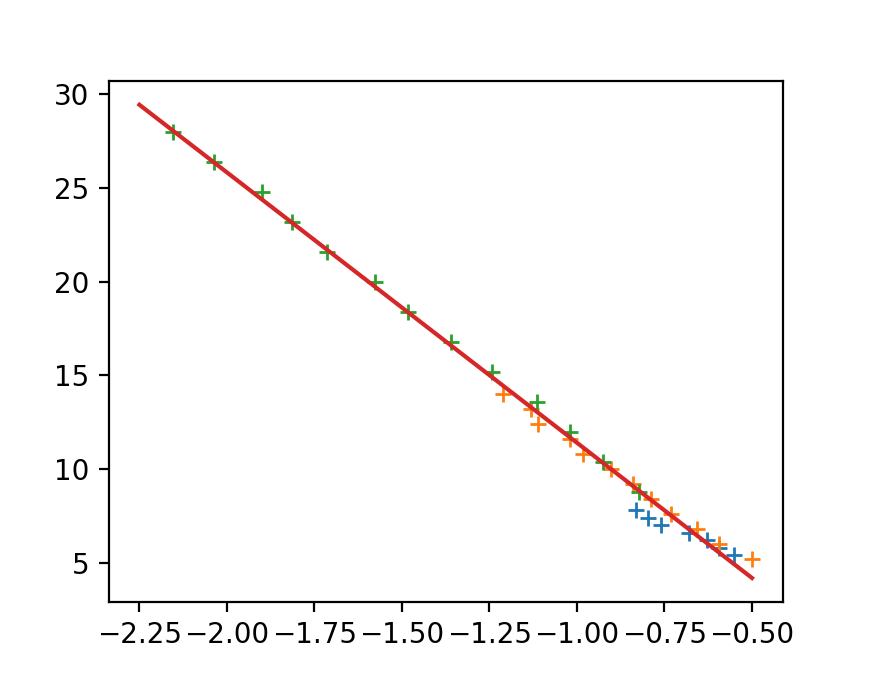

In [135]:
plt.figure()
plt.plot(vsh0, 1*bsh0, '+')
plt.plot(vsh1, 2*bsh1, '+')
plt.plot(vsh2, 4*bsh2, '+')
xl2 = np.array([-2.25, -0.5])
plt.plot(xl2, psh[0]*xl2 + psh[1])

In [12]:
nfull = Ch/1.602e-19*(V0h - V0fh)
a = 0.246e-9

theta = np.sqrt(np.sqrt(3)*nfull*a**2/8)*180/np.pi

### Angle 0.98$^\circ$

In [13]:
theta

0.976325156196663

However, the half and 3/4 filling states align best with 1.04$^\circ$, which also fits pretty well if you align the outside fans in a different way.

## Rxy fan

In [27]:
dfanpos = qc.load_data('data/2019-11-09/#004_M12_22_20and22_12xy_LandauFan_5nA_8Tto-5T_15-30-05')
dfanneg = qc.load_data('data/2019-11-10/#001_M12_22_20and22_12xy_LandauFan_5nA_-8Tto0T_14-20-38')

Rxy12pos = dfanpos.lockin830_X[:81, :]/5e-9
Rxx12pos = npd.Rxxfromdata(dfanpos, 5e-9, 'lockin865')[:81, :]
sigmaxy12pos = Rxy12pos/(Rxx12pos**2 + Rxy12pos**2)
vbg12 = dfanpos.srframe_volt_p1_set[0, :]
bpos = dfanpos.triton_field_set_stable_set[:81]

Rxy12neg = dfanneg.lockin830_X[:, :]/5e-9
bneg = dfanneg.triton_field_set_stable_set[:]

In [41]:
Vgatefull = 6.38454649743731*1.13  # This was used to get the 1.04 degree angle. 0.98 degrees lines up with the nu=2 insulator better though. But in the T-nu diagram 1.04 deg lines up better.
V0 = -0.17928806297904745 + 0.2
fillingM12 = np.interp(vbg12, [V0 - Vgatefull*6/4, V0 + Vgatefull*6/4], [-6, 6])

In [42]:
esqh = 1.602e-19**2/6.626e-34

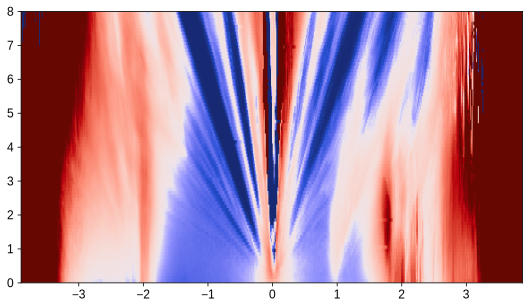

In [43]:
plt.figure(figsize=(9, 5))
plt.pcolormesh(fillingM12, bpos, Rxx12pos/1000, cmap=cc.cm.diverging_bwr_20_95_c54, norm=DivergingNorm(4, 0, 40), rasterized=True)

Text(0.5, 76.91666666666667, '$\\nu$')

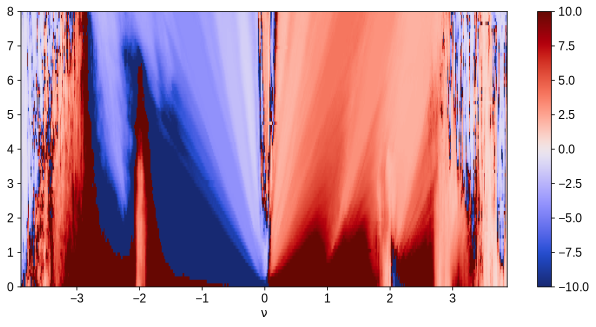

In [58]:
plt.figure(figsize=(9, 4.5))
plt.pcolormesh(fillingM12, bpos, 1/(Rxy12pos+0.0001)/esqh, cmap=cc.cm.diverging_bwr_20_95_c54, norm=DivergingNorm(0, -10, 10), rasterized=True)
plt.colorbar()
plt.tight_layout()
plt.xlabel('$\\nu$')
plt.ylabel('B (T)')
# plt.savefig(figfile + )

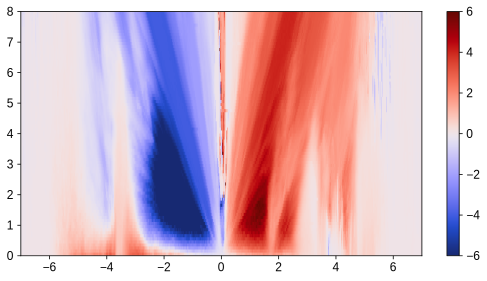

In [35]:
plt.figure(figsize=(9, 4.5))
plt.pcolormesh(vbg12, bpos, sigmaxy12pos/esqh, cmap=cc.cm.diverging_bwr_20_95_c54, norm=DivergingNorm(0, -6, 6), rasterized=True)
plt.colorbar()

# device M10

In [14]:
dfan2 = qc.load_data('data/2019-11-04/#002_M10_8_3and4_8xy_LandauFan_11-10-59')

gvals2 = dfan2.srframe_volt_p1_set[0, :]
bvals2 = dfan2.triton_field_set_stable_set[:71]
Rxx2 = dfan2.lockin865_X[:71, :]/0.5e-9
Rxy2 = dfan2.lockin830_X[:71, :]

In [155]:
bvals2[:71]

array([7.9 , 7.85, 7.8 , 7.75, 7.7 , 7.65, 7.6 , 7.55, 7.5 , 7.45, 7.4 ,
       7.35, 7.3 , 7.25, 7.2 , 7.15, 7.1 , 7.05, 7.  , 6.95, 6.9 , 6.85,
       6.8 , 6.75, 6.7 , 6.65, 6.6 , 6.55, 6.5 , 6.45, 6.4 , 6.35, 6.3 ,
       6.25, 6.2 , 6.15, 6.1 , 6.05, 6.  , 5.95, 5.9 , 5.85, 5.8 , 5.75,
       5.7 , 5.65, 5.6 , 5.55, 5.5 , 5.45, 5.4 , 5.35, 5.3 , 5.25, 5.2 ,
       5.15, 5.1 , 5.05, 5.  , 4.95, 4.9 , 4.85, 4.8 , 4.75, 4.7 , 4.65,
       4.6 , 4.55, 4.5 , 4.45, 4.4 ])

<IPython.core.display.Javascript object>


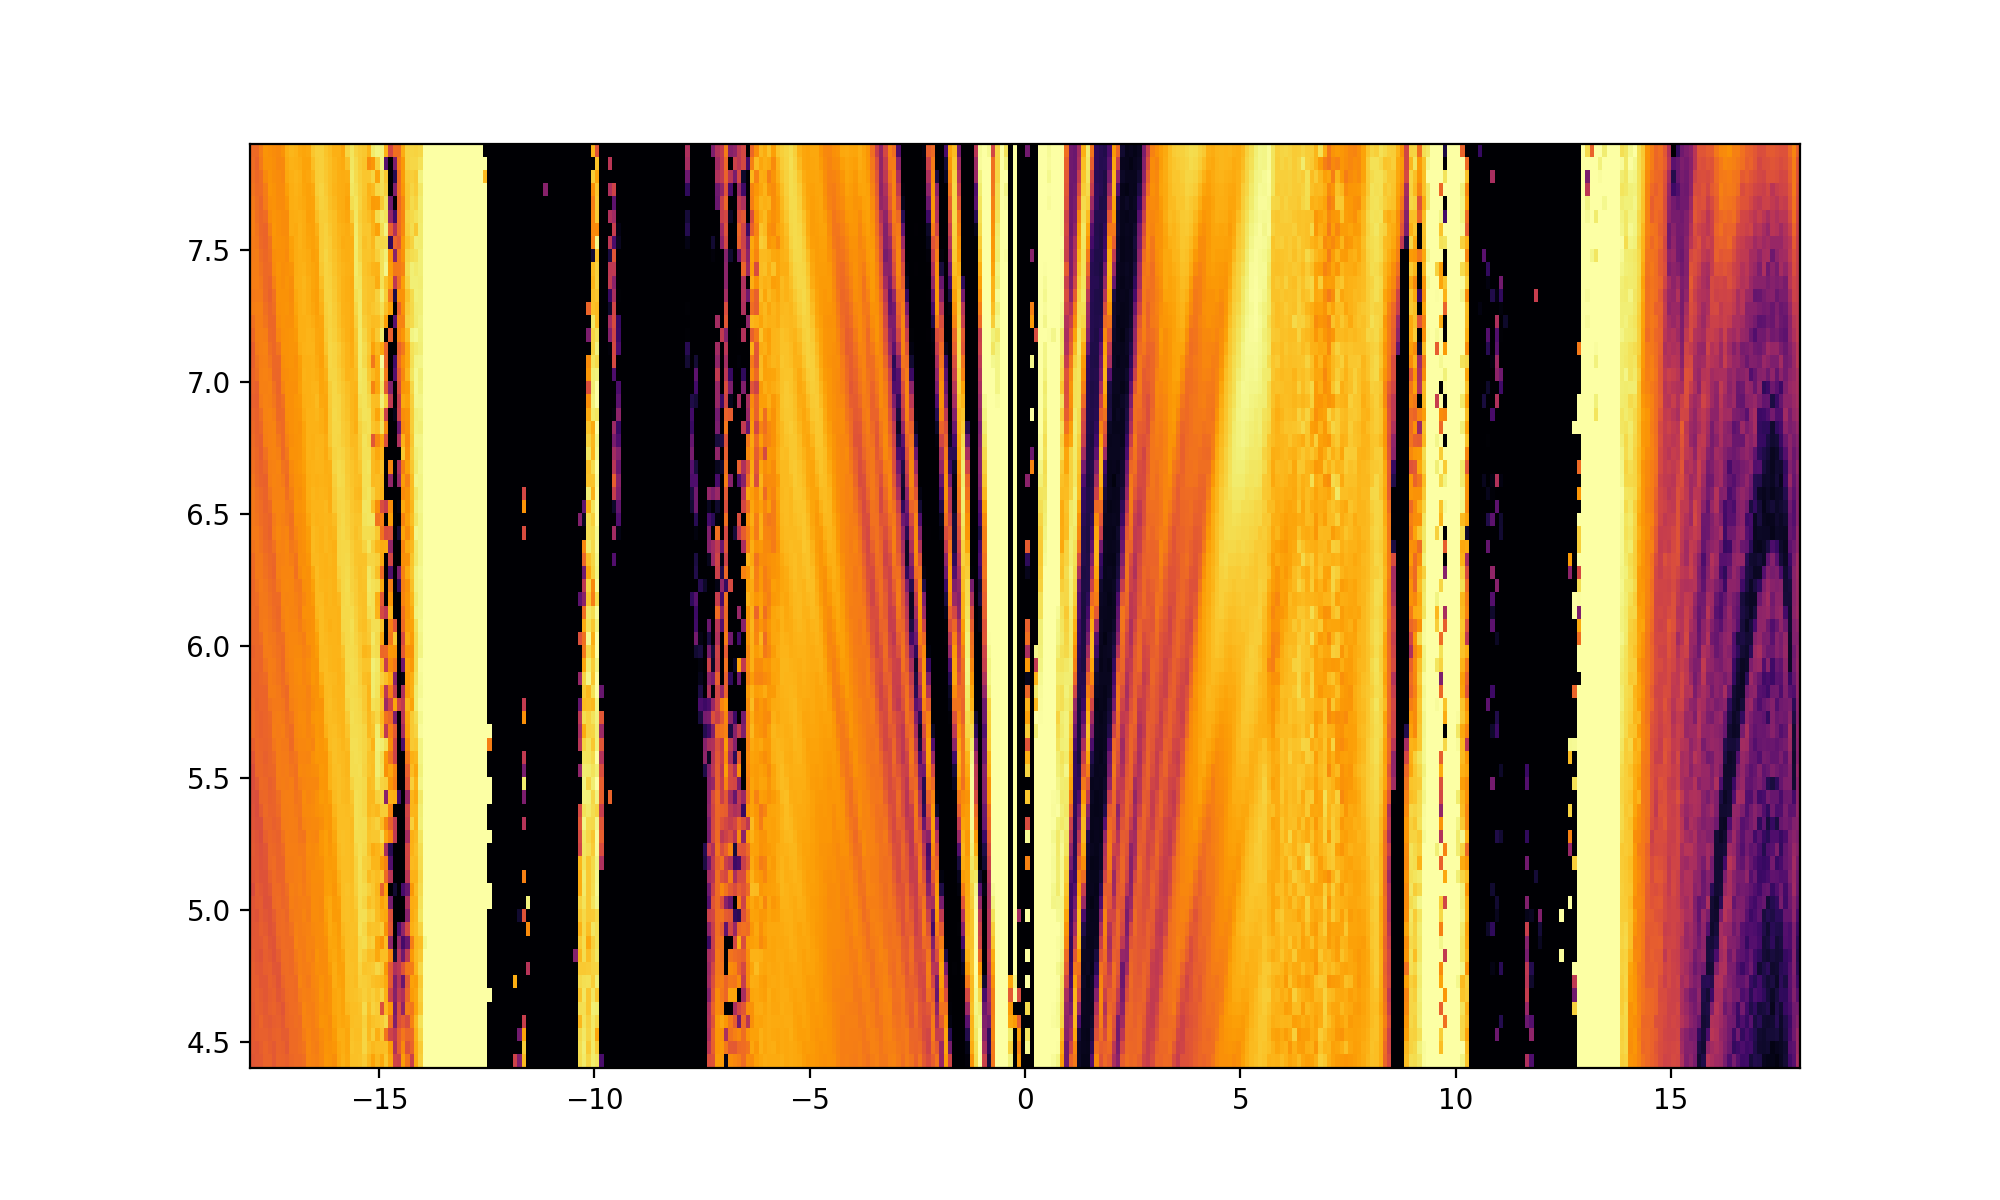

In [161]:
plt.figure(figsize=(10,6))
plt.pcolormesh(gvals2, bvals2, Rxx2, cmap='inferno', norm=SymLogNorm(1000, vmin=0, vmax=50000))

In [198]:
len(bvals2)

71

<IPython.core.display.Javascript object>


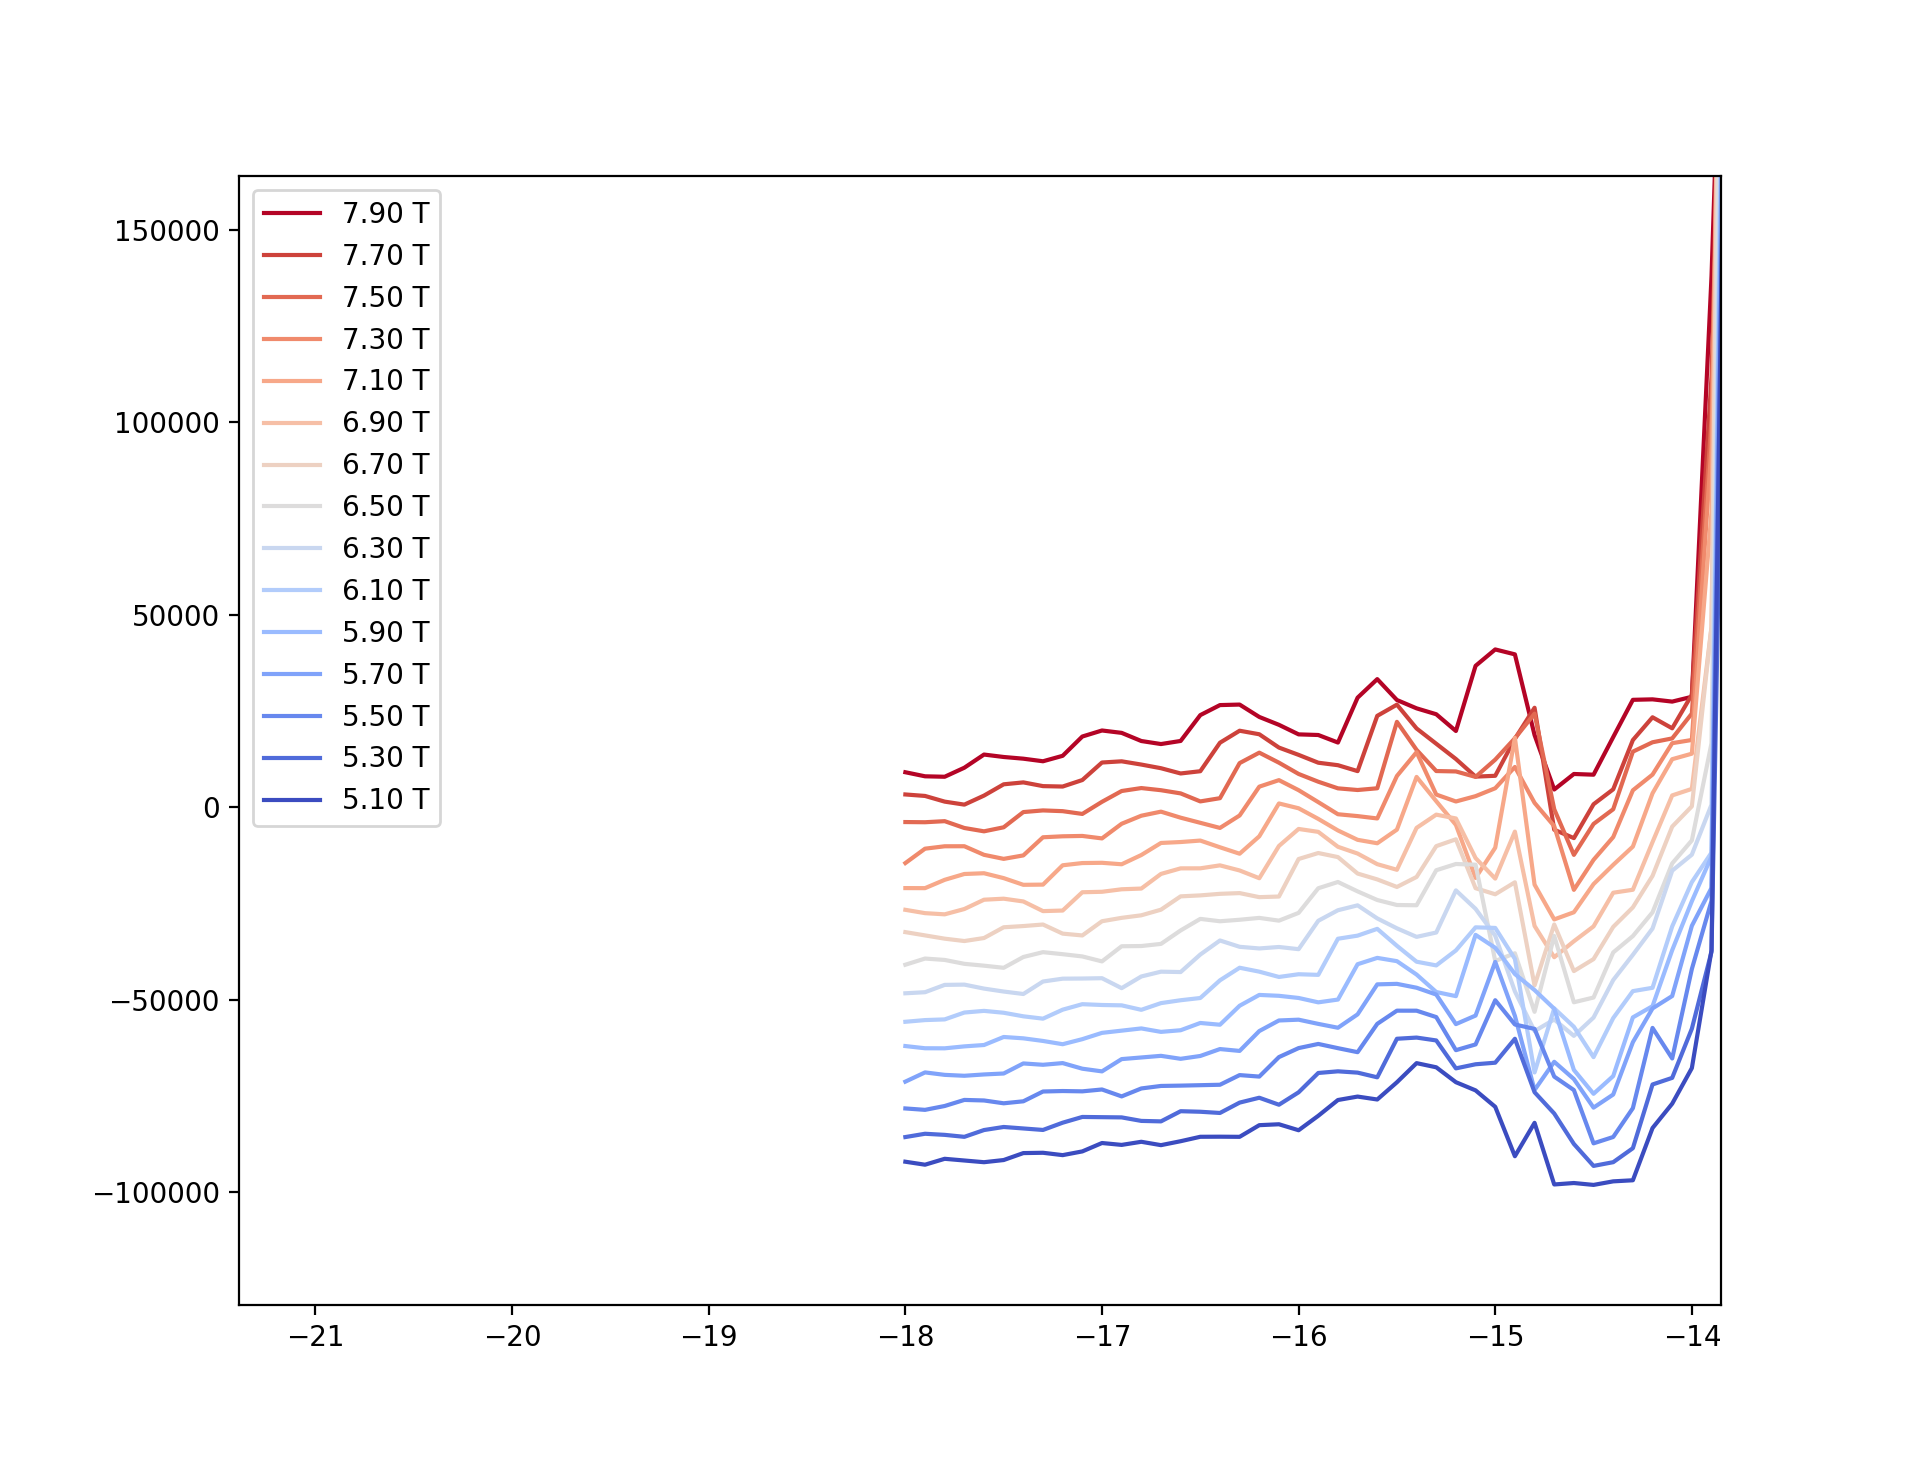

In [204]:
N = 15
cm = plt.get_cmap('coolwarm')([1 - i/(N-1) for i in range(N)])
plt.figure()
for i in range(N):
    ind = i*4
    field = bvals2[ind]
    plt.plot(gvals2, Rxx2[ind, :] - i*7000, label='{:.2f} T'.format(field), color=cm[i])
plt.legend()

In [441]:
v1f = np.array([-15.104, -15.153, -15.172, -15.239, -15.316, -15.379, -15.465, -15.513, -15.571, -15.643, -15.686, -15.720, -15.831, -15.912])
b1f = np.linspace(5.3, 7.9, 14)
v2f = np.array([-15.595, -15.701, -15.778, -15.840, -15.937, -16.004, -16.066, -16.129, -16.196, -16.283, -16.365, -16.446, -16.538, -16.648])
b2f = np.linspace(5.4, 7.9, 14)
v3f = np.array([-15.989, -16.090, -16.201, -16.312, -16.408, -16.499, -16.600, -16.697, -16.812, -16.894, -17.00, -17.091, -17.178, -17.269])
b3f = np.concatenate((np.linspace(5.1, 6.5, 8), np.linspace(6.9, 7.9, 6)))
v4f = np.array([-16.889, -17.004, -17.149, -17.245, -17.346, -17.471, -17.596, -17.711, -17.812])
b4f = np.linspace(6.3, 7.9, 9)
v5f = np.array([-16.903, -17.004, -17.1775, -17.3073, -17.3939, -17.505, -17.663, -17.817])
b5f = np.linspace(5.5, 6.9, 8)

vsf = np.concatenate((v1f, v2f, v3f, v4f, v5f))
bsf = np.concatenate((3*b1f, 4*b2f, 5*b3f, 6*b4f, 7*b5f))

pf = np.polyfit(vsf, bsf, 1, full=True)
slf, bf = pf[0]
resf = pf[1][0]
Vf = -bf/slf
Cf = -slf*(1.602e-19**2/6.626e-34)
dbnf = 8.85e-12*3/Cf
print('effective h-BN thickness: {:.2f} nm'.format(dbnf*10**9))

effective h-BN thickness: 56.90 nm


<IPython.core.display.Javascript object>


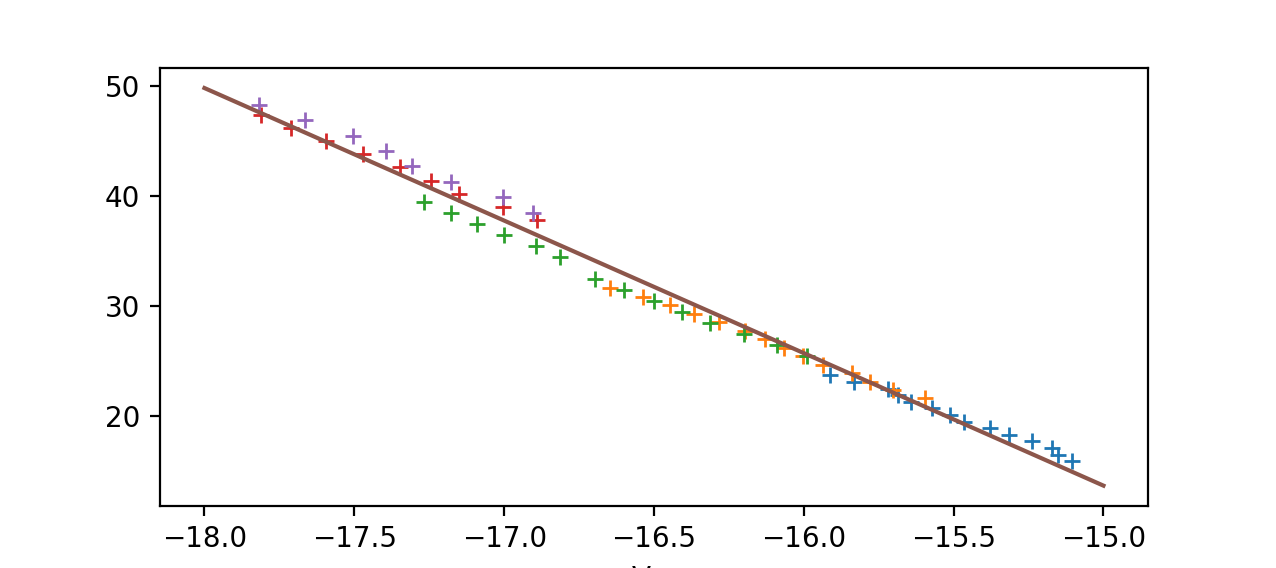

Text(0.5, 0, 'V$_{bg}$')

In [442]:
plt.figure()
plt.plot(v1f, 3*b1f, '+')
plt.plot(v2f, 4*b2f, '+')
plt.plot(v3f, 5*b3f, '+')
plt.plot(v4f, 6*b4f, '+')
plt.plot(v5f, 7*b5f, '+')
x0f = np.array([-18, -15])
plt.plot(x0f, x0f*slf + bf)
plt.xlabel('V$_{bg}$')

In [443]:
sumxsqf = 0
xavf = np.average(vsf)
for i in range(len(vsf)):
    sumxsqf += (vsf[i] - xavf)**2
    
Syxsqf = 1/(len(vsf) - 2)*resf

Smf = np.sqrt(Syxsqf/sumxsqf)
Sbf = np.sqrt(Syxsqf*np.sum(vsf**2)/(len(vsf)*sumxsqf))
StDf = np.sqrt((-Sbf/slf)**2 + (bf/slf**2*Smf)**2)

print('Sm: {:.4f},   Sb: {:.4f}'.format(Smf, Sbf))
print('StDev on Vf: {:.4f}'.format(StDf))

Sm: 0.1706,   Sb: 2.8094
StDev on Vf: 0.3049


In [444]:
print('Vf: {:.3f} +/- {:.3f}'.format(Vf, StDf))

Vf: -13.864 +/- 0.305


In [463]:
v1 = np.array([-0.894, -0.947, -0.976, -1.008, -1.033, -1.049, -1.073, -1.102, -1.122, -1.163, -1.200, -1.232, -1.261, -1.281, -1.302])
b1 = np.linspace(5.1, 7.9, 15)
v2 = np.array([-1.452, -1.489, -1.558, -1.591, -1.627, -1.672, -1.713, -1.749, -1.794, -1.843, -1.892])
b2 = np.linspace(5.9, 7.9, 11)
v3 = np.array([-1.684, -1.737, -1.806, -1.859, -1.933, -1.998, -2.059, -2.128, -2.189, -2.267, -2.328, -2.377, -2.450, -2.523, -2.588])
b3 = np.linspace(5.1, 7.9, 15)
v4 = np.array([-2.153, -2.230, -2.315, -2.393, -2.482, -2.576, -2.662, -2.743, -2.820, -2.902, -2.987, -3.069, -3.158, -3.248, -3.309])
b4 = np.linspace(5.1, 7.9, 15)

vs = np.concatenate((v1, v2, v3, v4))
bs = np.concatenate((2*b1, 3*b2, 4*b3, 5*b4))
p = np.polyfit(vs, bs, 1, full=True)
sl, b = p[0]
res = p[1][0]
V0 = -b/sl
C = -sl*(1.602e-19**2/6.626e-34)
dbn = 8.85e-12*3/C
print('effective h-BN thickness: {:.2f} nm'.format(dbn*10**9))

effective h-BN thickness: 57.05 nm


In [451]:
V0

0.0037051190453785874

<IPython.core.display.Javascript object>


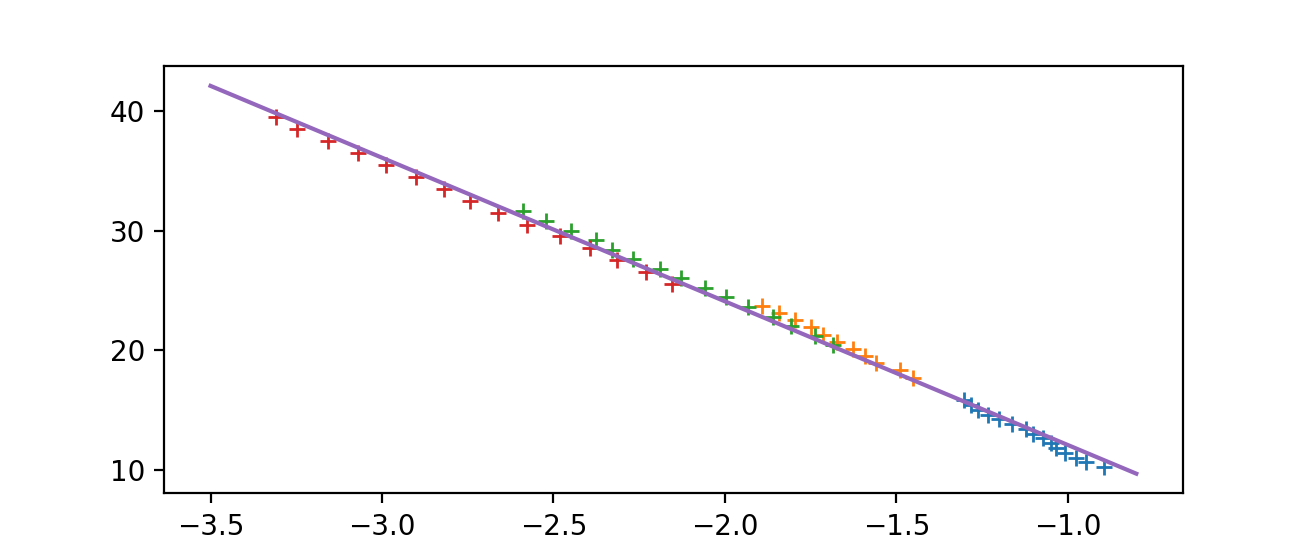

In [452]:
plt.figure()
plt.plot(v1, 2*b1, '+')
plt.plot(v2, 3*b2, '+')
plt.plot(v3, 4*b3, '+')
plt.plot(v4, 5*b4, '+')
x0 = np.array([-3.5, -0.8])
plt.plot(x0, x0*sl + b)

In [453]:
sumres = 0
for i in range(len(vs)):
    y = sl*vs[i] + b
    sumres += (bs[i] - y)**2
print(sumres, res)  # the residuals are what we expect, fortunately

12.961654092406738 12.961654092406791


In [455]:
sumxsq = 0
xav = np.average(vs)
for i in range(len(vs)):
    sumxsq += (vs[i] - xav)**2
    
Syxsq = 1/(len(vs) - 2)*res

Sm = np.sqrt(Syxsq/sumxsq)
Sb = np.sqrt(Syxsq*np.sum(vs**2)/(len(vs)*sumxsq))
StD = np.sqrt((-Sb/sl)**2 + (b/sl**2*Sm)**2)

print('Sm: {:.4f},   Sb: {:.4f}'.format(Sm, Sb))
print('StDev on V0: {:.4f}'.format(StD))

Sm: 0.0985,   Sb: 0.2009
StDev on V0: 0.0167


In [456]:
print('V0: {:.3f} +/- {:.3f}'.format(V0, StD))

V0: 0.004 +/- 0.017


### Angle 1.316 +/- 0.015$^\circ$

In [461]:
Vfulldiff = (V0 - Vf)
VfullStD = np.sqrt(StD**2 + StDf**2)
nfull = C/1.602e-19*Vfulldiff
CStD = Sm*1.602e-19**2/6.626e-34
nfullStD = np.sqrt((CStD/1.602e-19*Vfulldiff)**2 + (VfullStD*C/1.602e-19)**2)
a = 0.246e-9
const = np.sqrt(np.sqrt(3)*a**2/8)*180/np.pi
theta = const*np.sqrt(nfull)
thetaStD = const*0.5*nfull**(-0.5)*nfullStD
print('theta: {:.3f} +/- {:.3f} degrees'.format(theta, thetaStD))

theta: 1.316 +/- 0.015 degrees


## Some attempts at automatic peak fitting

In [212]:
from scipy.signal import find_peaks

In [283]:
minstep = np.min(np.abs(Rxx2[0, :-1] - Rxx2[0, 1:]))

In [306]:
def findedges(array, peaks, thresh, region=10):
    right_edges = np.zeros(len(peaks), dtype=int)
    left_edges = np.zeros(len(peaks), dtype=int)
    for i, p in enumerate(peaks):
        pheight = array[p]
        for r in range(region):
            if p + r + 1 == len(array):
                right_edges[i] = p + r
                break
            elif array[p + r] < pheight - thresh:
                right_edges[i] = p + r
                break
        
        for r in range(region):
            if p - r == 0:
                left_edges[i] = 0
                break
            elif array[p - r] < pheight - thresh:
                left_edges[i] = p - r
                break
                
    return left_edges, right_edges

<IPython.core.display.Javascript object>


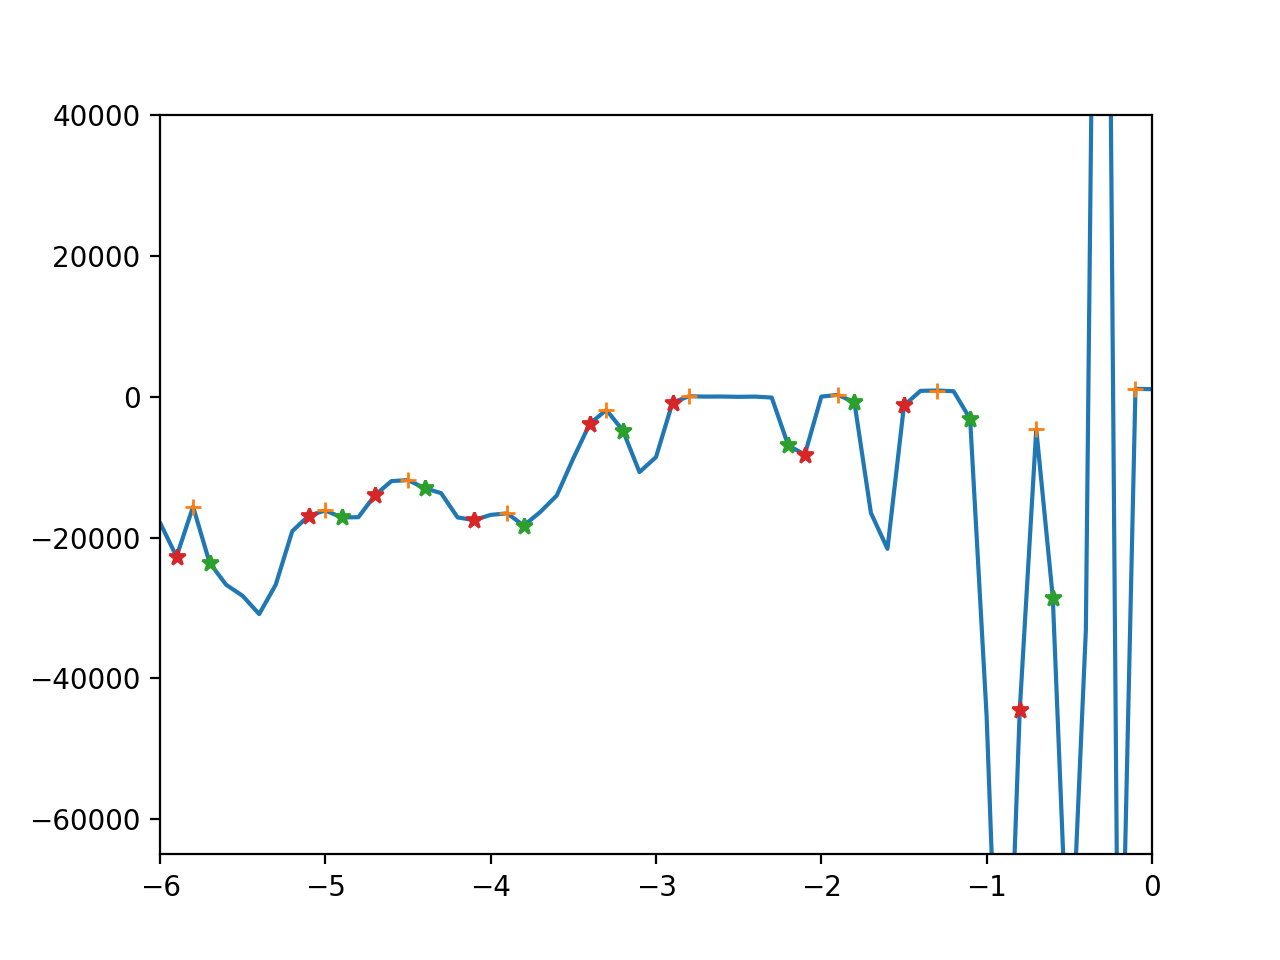

[-6, 0, -65000, 40000]

In [307]:
peaks, prop = find_peaks(-1*Rxx2[0, :], distance=4, height=(-25000, 10000), prominence=5*minstep, wlen=10)
left_edges, right_edges = findedges(-1*Rxx2[0, :], peaks, 30*minstep)
plt.figure()
plt.plot(gvals2, -1*Rxx2[0, :])
plt.plot(gvals2[peaks], -1*Rxx2[0, peaks], '+')
plt.plot(gvals2[left_edges], -1*Rxx2[0, left_edges], '*')
plt.plot(gvals2[right_edges], -1*Rxx2[0, right_edges], '*')
plt.axis([-6, 0, -65000, 40000])

In [317]:
gvals2[peaks]

array([ 17.7,  17.1,  15.8,  15.1,  14.7,  13.2,  12.1,  11.7,  11. ,
        10.4,   9.8,   8.9,   7.7,   7.1,   5. ,   4.4,   2.6,   1.9,
         1.2,  -0.1,  -0.7,  -1.3,  -1.9,  -2.8,  -3.3,  -3.9,  -4.5,
        -5. ,  -5.8,  -6.4,  -6.8,  -7.6,  -8. ,  -9.1, -10.5, -14.7,
       -15.2, -15.8, -16.7, -17.3, -17.8])

In [316]:
npeak = 23
print(peaks[npeak])
print(gvals2[peaks[npeak]])
print(gvals2[left_edges[npeak]], gvals2[right_edges[npeak]])
print(-1*Rxx2[0, left_edges[npeak]], -1*Rxx2[0, right_edges[npeak]], -1*Rxx2[0, peaks[npeak]])
print((gvals2[left_edges[npeak]] + gvals2[right_edges[npeak]])/2)

208
-2.8
-2.2 -2.9
-6909.224339399999 -818.22759058 77.701805878
-2.55


In [321]:
# this built-in function doesn't work as well as mine since it's based on prominence rather than left/right thresholds
print(prop['left_bases'][npeak], gvals2[prop['left_bases'][npeak]])
print(prop['right_bases'][npeak], gvals2[prop['right_bases'][npeak]])
print((gvals2[prop['left_bases'][npeak]]+ gvals2[prop['right_bases'][npeak]])/2)  # a little off-center

203 -2.3
211 -3.1
-2.7


<IPython.core.display.Javascript object>


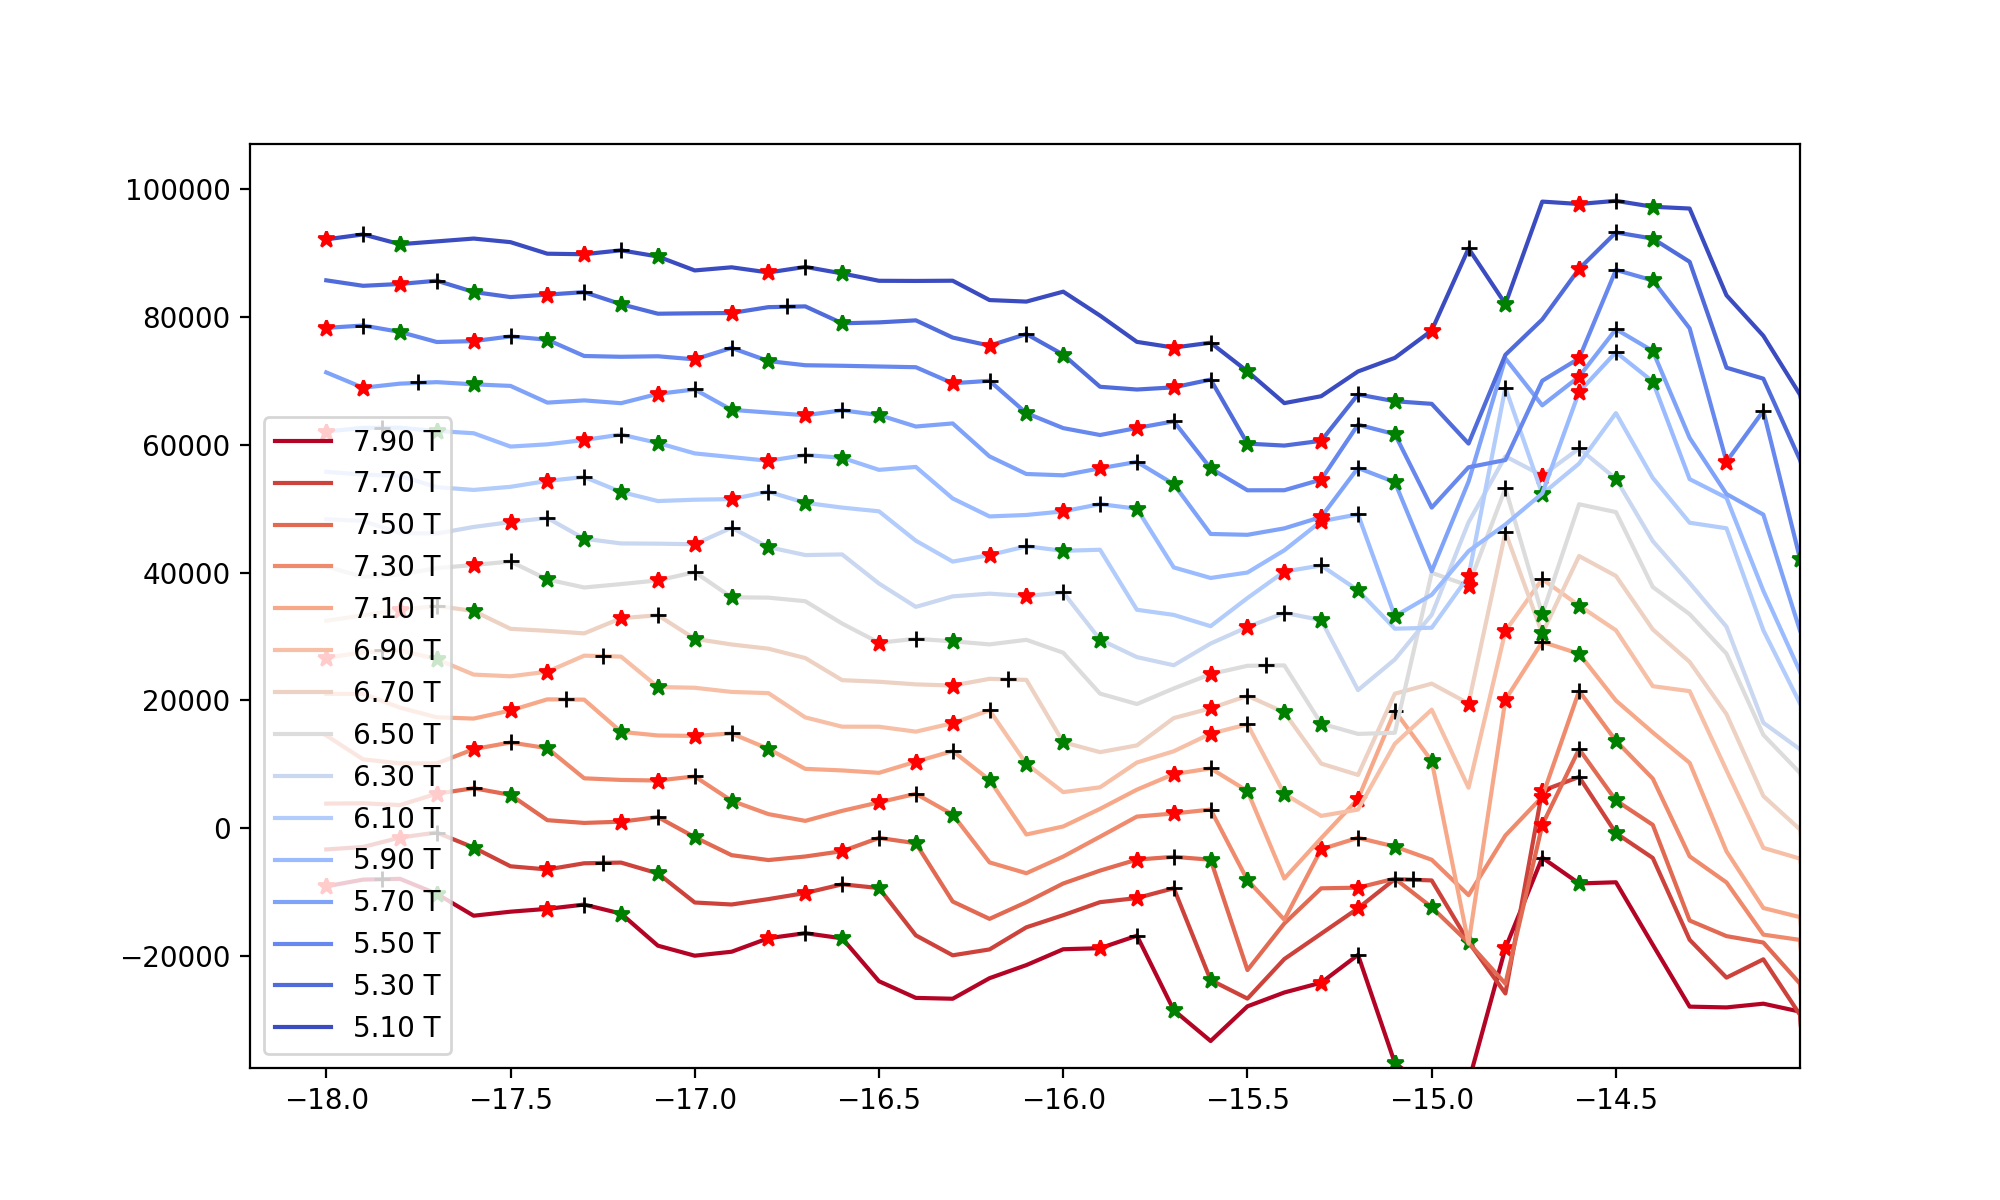

[-10, 0, -50000, 150000]

In [329]:
N = 15
cm = plt.get_cmap('coolwarm')([1 - i/(N-1) for i in range(N)])
plt.figure(figsize=(10, 6))
peakarray = []
fieldarray = []
for i in range(N):
    ind = i*4
    field = bvals2[ind]
    peaks, prop = find_peaks(-1*Rxx2[ind, :], distance=4, height=(-25000, 10000), prominence=5*minstep, wlen=10)
    left_edges, right_edges = findedges(-1*Rxx2[ind, :], peaks, 30*minstep)
    midpeaks = (gvals2[left_edges] + gvals2[right_edges])/2
    for p in midpeaks:
        fieldarray.append(field)
        peakarray.append(p)
    plt.plot(gvals2, -1*Rxx2[ind, :] + 7000*i, label='{:.2f} T'.format(field), color=cm[i])
    plt.plot(midpeaks, -1*Rxx2[ind, peaks] + 7000*i, '+k')
    plt.plot(gvals2[left_edges], -1*Rxx2[ind, left_edges] + 7000*i, '*g')
    plt.plot(gvals2[right_edges], -1*Rxx2[ind, right_edges] + 7000*i, '*r')
plt.legend()
plt.axis([-10, 0, -50000, 150000])

In [498]:
-bf/slf/2

-6.9322378544496415

In [491]:
bf + slf*-14

1.6325972258932495

For you to maintain a constant x-intercept, you need to use 0 = mx + b -> x = -b/m. When you change m by a constant m -> m' = a*m, then x = -b/(a*m), and b needs to be modified as well. b -> b' = a*b. When the x-intercept changes totally, we can keep the same slopes but need to modify b by: x0 -> x0' = x0 + c, b -> -(x0 + c)*m.

Given all this, how do we get the x value that keeps the line to a constant y value: B. B = mx + b - > x = (B-b)/m. If we change to the equation y = (mx + b)*d, then when y=B, x = (B/d-b)/m.

<IPython.core.display.Javascript object>


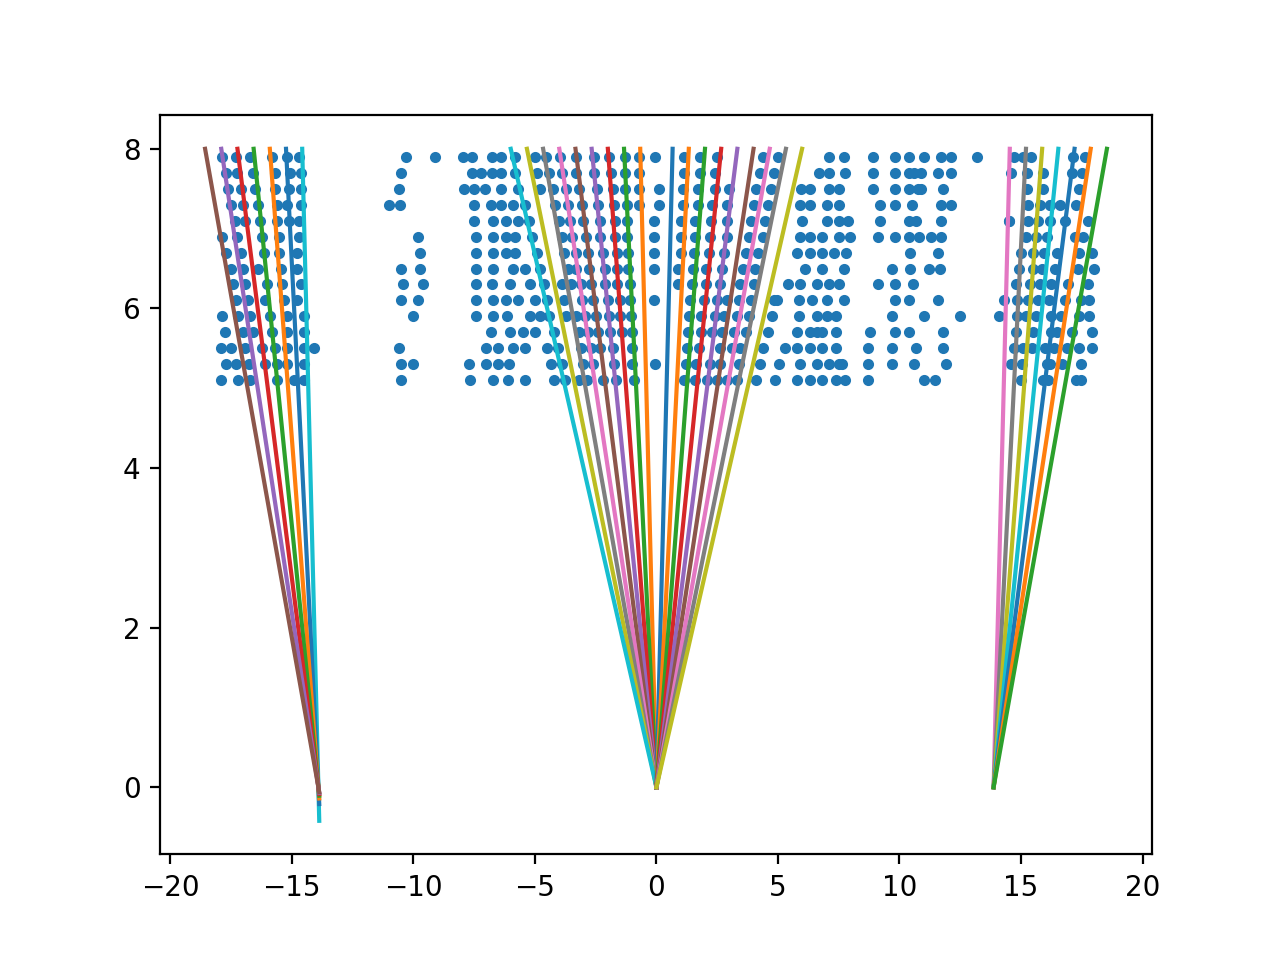

In [547]:
plt.figure()
plt.plot(peakarray, fieldarray, '.')
# plt.axis([-10, 0, 5, 8])
# x1 = np.array([-0.65, V0])
# plt.plot(x1, x1*sl + b)
# x2 = np.array([-1.3, V0])
# plt.plot(x2, (x2*sl + b)/2)
# x3 = np.array([-2, V0])
# plt.plot(x3, (x3*sl + b)/3)
# x4 = np.array([-2.6, V0])
# plt.plot(x4, (x4*sl + b)/4)
# x5 = np.array([-3.3, V0])
# plt.plot(x5, (x5*sl + b)/5)

B = 8

for i in range(1, 10):
    x = np.array([(B*i - b)/sl, V0])
    plt.plot(x, (x*sl + b)/i)
    
for i in range(1, 10):
    x = np.array([(-B*i - b)/sl, V0])
    plt.plot(x, (x*sl + b)/i*-1)

# x1p = np.array([0.65, V0])
# plt.plot(x1p, -1*(x1p*sl + b))
# x2p = np.array([1.3, V0])
# plt.plot(x2p, (x2p*sl + b)/-2)
# x3p = np.array([2, V0])
# plt.plot(x3p, (x3p*sl + b)/-3)
# x4p = np.array([2.6, V0])
# plt.plot(x4p, (x4p*sl + b)/-4)
# x5p = np.array([3.3, V0])
# plt.plot(x5p, (x5p*sl + b)/-5)

# x1f = np.array([-15.9, Vf])
# plt.plot(x1f, (x1f*sl + bf)/3)
# x2f = np.array([-16.6, Vf])
# plt.plot(x2f, (x2f*sl + bf)/4)
# x3f = np.array([-17.2, Vf])
# plt.plot(x3f, (x3f*sl + bf)/5)
# x4f = np.array([-18, Vf])
# plt.plot(x4f, (x4f*sl + bf)/6)

for i in range(1, 8):
    x1f = np.array([(B*i - bf)/sl, Vf])
    plt.plot(x1f, (x1f*sl + bf)/i)


Vfe = V0 + (V0 - Vf)
bfe = Vfe*-1*sl

for i in range(1, 8):
    x1f = np.array([(-B*i - bfe)/sl, Vfe])
    plt.plot(x1f, (x1f*sl + bfe)/-i)

# x0f = np.array([15.2, Vfe])
# plt.plot(x0f, (x0f*sl + bfe)/-2)
# x1f = np.array([15.9, Vfe])
# plt.plot(x1f, (x1f*sl + bfe)/-3)
# x2f = np.array([16.6, Vfe])
# plt.plot(x2f, (x2f*sl + bfe)/-4)
# x3f = np.array([17.2, Vfe])
# plt.plot(x3f, (x3f*sl + bfe)/-5)
# x4f = np.array([18, Vfe])
# plt.plot(x4f, (x4f*sl + bfe)/-6)

In [550]:
Vf-V0

-13.868180827944661

In [551]:
nfull2 = C/1.602e-19*(4.9*2)
nfull2

2.8471219019178772e+16

In [548]:
nfull

4.0290205484692696e+16

In [552]:
theta

1.3164149351769185

In [553]:
# for another set of contacts, same C, theoretically
theta2 = theta*np.sqrt(nfull2/nfull)
theta2

1.106613823035106

In [206]:
R2av = np.average(Rxx2, axis=0)

In [ ]:
def minfinder(curve, p0):
    """Returns the local minima close to the array of initial values p0. Uses the sidewalls to calculate the halfway
    point since the minima can be broad, flat areas."""
    

In [ ]:
vh1 = np.array([])

In [ ]:
'data/2019-11-10/#001_M12_22_20and22_12xy_LandauFan_5nA_-8Tto0T_14-20-38'

# More M10

Electrodes 26-25 (Rxy 26-29) to 7T

In [42]:
dm10_1 = qc.load_data('data/2019-11-06/#006_M10_26_25and26_29xy_LandauFan_5nA_7Tto0T_21-41-34')
vbgm10_1 = dm10_1.srframe_volt_p1_set[0, :]
Bm10_1 = dm10_1.triton_field_set_stable_set[:]
Rxxm2625_1 = npd.Rxxfromdata(dm10_1, 5e-9, 'lockin865')
Rxym2629_1 = dm10_1.lockin830_X[:, :]/5e-9

12.3 -32.595


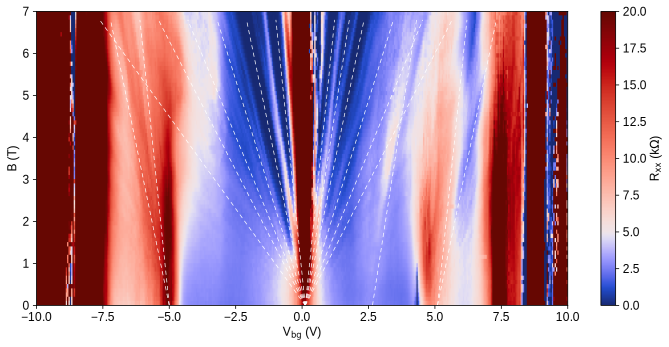

In [43]:
plt.figure(figsize=(10, 5))
plt.pcolormesh(vbgm10_1, Bm10_1, Rxxm2625_1/1000, cmap=cc.cm.diverging_bwr_20_95_c54, norm=DivergingNorm(5, 0, 20), rasterized=True)
plt.colorbar(label='R$_{xx}$ (k$\Omega$)')
plt.ylabel('B (T)')
plt.xlabel('V$_{bg}$ (V)')
plt.tight_layout()
# plt.savefig(figfile + 'M10.svg', dpi=300, bbox_inches='tight')

V0 = 0.12
sl = 12.3
b = -sl*V0
Vgatefull = 8.081768748385855
slfill = sl#-sl*Vgatefull/4

Bl = 6.8
Bs = 0
LW = 0.7
dashes = (6, 5)
for i in [-14, -10, -8, -6, -4, -2, 2, 3, 4, 6, 8, 10]:
    x = np.linspace((Bs*i - b)/slfill, (Bl*i - b)/slfill, 5)
    plt.plot(x, (x*slfill + b)/i, '--', color='white', lw=LW, dashes=dashes)
    
Vhalf = 5.1
b = -sl*Vhalf
for i in [2, 4]:
    x = np.linspace((Bs*i - b)/slfill, (Bl*i - b)/slfill, 5)
    plt.plot(x, (x*slfill + b)/i, '--', color='white', lw=LW, dashes=dashes)
    
Vhalfn = -5
b = -sl*Vhalfn
for i in [-2, -4]:
    x = np.linspace((Bs*i - b)/slfill, (Bl*i - b)/slfill, 5)
    plt.plot(x, (x*slfill + b)/i, '--', color='white', lw=LW, dashes=dashes)

Vquart = 2.65
b = -sl*Vquart
i = 3
x = np.linspace((Bs*i - b)/slfill, (Bl*i - b)/slfill, 5)
plt.plot(x, (x*slfill + b)/i, '--', color='white', lw=LW, dashes=dashes)
print(sl, b)

# plt.savefig(figfile + 'M10_1p14_2526_RxxFanto7T.png', dpi=300, bbox_inches='tight')

In [44]:
0.12 + 5.05/2

2.645

In [45]:
sl, b = (-12.3, 1.599)
C = -sl*1.602e-19**2/6.626e-34
dBN = 3*8.85e-12/C
V0 = -b/sl
print('effective capacitance: {:.4e}'.format(C))
print('effective hBN thickness: {:.1f} nm'.format(dBN*10**9))
print('V0: ', V0)

effective capacitance: 4.7641e-04
effective hBN thickness: 55.7 nm
V0:  0.13


In [46]:
# slf, bf = (-11.684640404016196, -90.57221927031419)
Vgatefull = Vhalf - Vhalfn
print('Full filling voltage difference: {}'.format(Vgatefull))
nfull = (Vgatefull)*C/1.602e-19/10**4
print(nfull/10**12) #10**12 cm^-2
a = 0.246e-9

theta = np.sqrt(np.sqrt(3)*nfull*10**4*a**2/8)*180/np.pi
print('theta: ', theta)

Full filling voltage difference: 10.1
3.0035686688801695
theta:  1.1366109676100764


Try for the same Rxy electrodes, but there was one where 8T was included (magnet quench at around 5T so restarted fan sweep)

In [90]:
dm10rxy0 = qc.load_data('data/2019-11-15/#006_M10_26_29_865and25_2_830_8Tto0T_2nA_13-56-49')
dm10rxy1 = qc.load_data('data/2019-11-17/#001_M10_26_29_865and25_2_830_5.5Tto0T_2nA_14-28-41')
Brxym10 = np.concatenate((dm10rxy0.triton_field_set_stable_set[:25], dm10rxy1.triton_field_set_stable_set[:]))
vbgm10_rxy = dm10rxy0.srframe_volt_p1_set[0, :]
Rxy2629_2 = np.vstack((dm10rxy0.lockin865_X[:25, :], dm10rxy1.lockin865_X[:, :]))/2e-9
Rxy252_1 = np.vstack((dm10rxy0.lockin830_X[:25, :], dm10rxy1.lockin830_X[:, :]))/2e-9

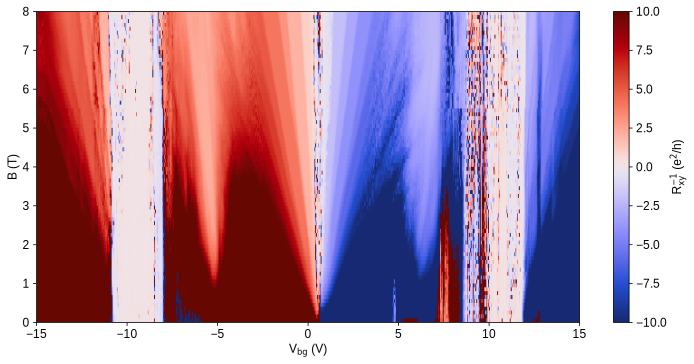

In [98]:
plt.figure(figsize=(10, 5))
plt.pcolormesh(vbgm10_rxy, Brxym10, 1/Rxy2629_2/esqh, cmap=cc.cm.diverging_bwr_20_95_c54, norm=DivergingNorm(0, -10, 10), rasterized=True)
plt.colorbar(label='R$_{xy}^{-1}$ (e$^2$/h)')
plt.tight_layout()
plt.xlabel('V$_{bg}$ (V)')
plt.ylabel('B (T)')
plt.savefig(figfile + 'M10_2629_invRxyto8T.png', dpi=300, bbox_inches='tight')

Text(301.41666666666663, 0.5, 'B (T)')

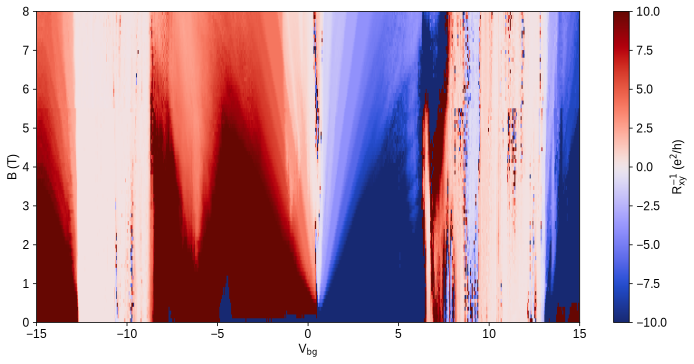

In [105]:
plt.figure(figsize=(10, 5))
plt.pcolormesh(vbgm10_rxy, Brxym10, 1/(Rxy252_1 + 0.0001)/esqh, cmap=cc.cm.diverging_bwr_20_95_c54, norm=DivergingNorm(0, -10, 10), rasterized=True)
plt.colorbar(label='R$_{xy}^{-1}$ (e$^2$/h)')
plt.tight_layout()
plt.xlabel('V$_{bg}$')
plt.ylabel('B (T)')

## M10 Temperature-nu dependence

In [145]:
M10_292_0 = qc.load_data('data/2019-11-25/#002_baseTempgatesweep_M12_20-22_lockin865_M10_29-2_lockin830_17-55-55')
M10_292_1 = qc.load_data('data/2019-11-25/#003_2d_gate_Tempsweep_base-1K_M12_20-22_lockin865_M10_29-2_lockin830_18-12-32')  # 50mK to 1K
M10_292_2 = qc.load_data('data/2019-11-25/#004_2d_gate_Tempsweep_1.1-1.4K_M12_20-22_lockin865_M10_29-2_lockin830_22-46-54')
M10_292_3 = qc.load_data('data/2019-11-25/#005_2d_gate_Tempsweep_1.5-2K_M12_20-22_lockin865_M10_26-25_lockin830_23-39-49')
M10_292_4 = qc.load_data('data/2019-11-26/#001_2d_gate_Tempsweep_2-5K_M12_20-22_lockin865_M10_29-2_lockin830_00-59-35')
M10_292_5 = qc.load_data('data/2019-11-26/#002_2d_gate_Tempsweep_5-10K_M12_20-22_lockin865_M10_29-2_lockin830_07-49-36')

Vbg292T = M10_292_0.srframe_volt_p1_set[:]

T292 = np.concatenate(([0.025], np.linspace(0.05, 1, 20), np.linspace(1.1, 1.9, 9), np.linspace(2, 5, 31), np.linspace(5.2, 10, 25)))
RxxT292 = np.vstack((npd.Rxxfromdata(M10_292_0, 0.2e-9, 'lockin830'), npd.Rxxfromdata(M10_292_1, 0.2e-9, 'lockin830'), npd.Rxxfromdata(M10_292_2, 0.2e-9, 'lockin830'), npd.Rxxfromdata(M10_292_3, 0.2e-9, 'lockin830')[:-1, :], npd.Rxxfromdata(M10_292_4, 0.2e-9, 'lockin830'), npd.Rxxfromdata(M10_292_5, 0.2e-9, 'lockin830')))

In [146]:
nuT292 = np.interp(Vbg292T, [V0+0.35 - Vgatefull*6/4, V0+0.35 + Vgatefull*6/4], [-6, 6])

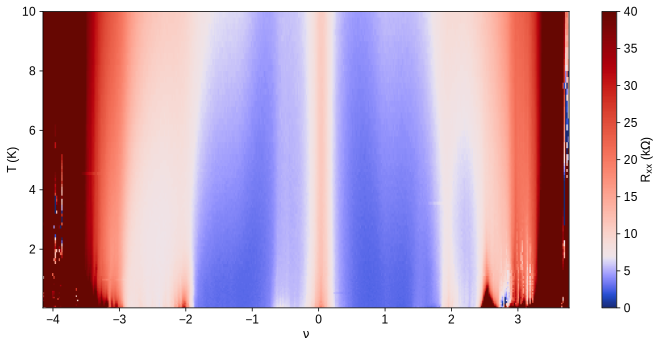

In [147]:
plt.figure(figsize=(10, 5))  # Note that these are different electrodes than the Landau Fan
plt.pcolormesh(nuT292, T292, RxxT292/1000, cmap=cc.cm.diverging_bwr_20_95_c54, norm=DivergingNorm(7, 0, 40), rasterized=True)
plt.colorbar(label='R$_{xx}$ (k$\Omega$)')
plt.xlabel('$\\nu$')
plt.ylabel('T (K)')
plt.tight_layout()
# plt.savefig(figfile + 'M10_29-2_Rxx_Temp_diagramto10K.png', dpi=300, bbox_inches='tight')

## Look at contacts 8-3

Is this actually contacts 8-3? What is up with it? See bottom...

In [25]:
d83 = qc.load_data('data/2019-11-06/#005_M10_8_3and4_8xy_LandauFan_5nA_5Tto0T_13-42-55')
B83 = d83.triton_field_set_stable_set[:]
g83 = d83.srframe_volt_p1_set[0, :]
Rxx83 = npd.Rxxfromdata(d83, 5e-9, 'lockin865')
Rxy48 = d83.lockin830_X[:, :]/5e-9

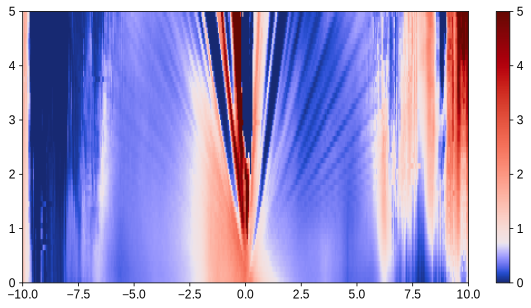

In [144]:
plt.figure(figsize=(10, 5)) # much lower resistance. Looks like maybe a large angle
plt.pcolormesh(g83, B83, Rxx83/1000, cmap=cc.cm.diverging_bwr_20_95_c54, norm=DivergingNorm(0.75, 0, 5), rasterized=True)
plt.colorbar()

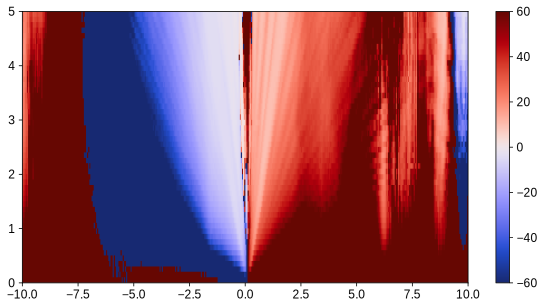

In [143]:
plt.figure(figsize=(10, 5))
plt.pcolormesh(g83, B83, -1/(Rxy48 + 0.0001)/esqh, cmap=cc.cm.diverging_bwr_20_95_c54, norm=DivergingNorm(0, -60, 60), rasterized=True)
plt.colorbar()

In [61]:
dsweep83 = qc.load_data('data/2019-11-15/#003_M10_3-8_865_7-8_830_basetemp_0T_sensorsdisconnected_2nA_12-43-25')
dsweep83_0 = qc.load_data('data/2019-11-05/#004_M10_3-8_basetemp_0T_sensorsdisconnected_2nA_10-19-07')
# What in the world is wrong with this? Why are the values not at all consistent?

dsweep252 = qc.load_data('data/2019-11-06/#002_M10_25-2_gatesweep_1nA_0T_12-00-54')
# maybe the fan is a combination of electrodes like 2-8 instead of 3-8

(0, 10000)

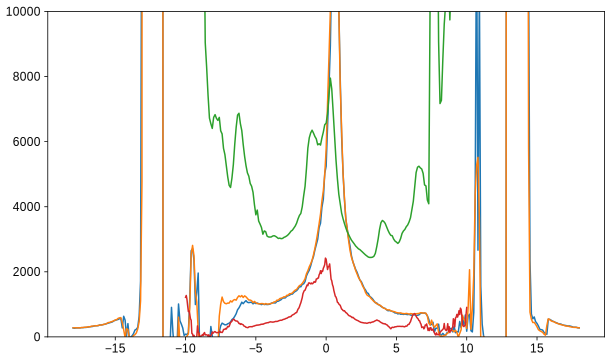

In [67]:
plt.figure(figsize=(10, 6))
plt.plot(dsweep83.srframe_volt_p1_set[:], npd.Rxxfromdata(dsweep83, 2e-9, 'lockin865'))
plt.plot(dsweep83_0.srframe_volt_p1_set[:], npd.Rxxfromdata(dsweep83_0, 2e-9, 'lockin865'))
plt.plot(dsweep252.srframe_volt_p1_set[:], npd.Rxxfromdata(dsweep252, 1e-9, 'lockin865'))
plt.plot(g83, Rxx83[-1, :])
# plt.xlim(-14, -11)
plt.ylim(0, 10000)

In [47]:
Vgatefullappmin = (13 + 11.75)/2  # using the blue curve from 8-3 single gate sweep. Why is the fan sweep so different???

In [48]:
C = 4.7641e-04
nfull = (Vgatefullappmin)*C/1.602e-19/10**4
a = 0.246e-9
theta = np.sqrt(np.sqrt(3)*nfull*10**4*a**2/8)*180/np.pi
print('min theta: ', theta)

min theta:  1.258128041316869
